### Contents

#### - ***`Question`***:

- 1. Examine the provided Dubai real estate data - sales and rental transactions only - to uncover key insights and trends. Support your findings with relevant visualizations. (10 points)

- 2. Utilize the additional datasets to identify macroeconomic factors, such as GDP, tourism, population, and energy, that may impact the real estate market. (10 points)

- 3. Explore the correlations between these macroeconomic factors and property sale or rental prices. Highlight the most significant factors driving market behavior. (10 points)

#### - ***`Solution`***:

**Exploratory Data Analysis (EDA) Plan**

To perform a comprehensive EDA and address the required question, we'll examine **Dubai's real estate data** alongside **macroeconomic datasets** using these step-by-step approach:

---

**Step 1: Real Estate Data (Sales & Rentals)**

**Tasks:**
1. **Load and Inspect Data:**
   - Load `processed_rents.parquet` and `processed_transactions.parquet` datasets.
   - Refactor to reconcile conflicting variables
   - Check for missing values, data types, and anomalies.

2. **Univariate Analysis:**
   - Distribution of property types, sizes, and rental/sale prices.
   - Time-series trends for transaction volume and average prices.

3. **Bivariate Analysis:**
   - Analyze price variations by:
     - Property type/sub-type.
     - Number of bedrooms.
     - Area/neighborhood.
     - Usage (commercial vs. residential).

4. **Temporal Trends:**
   - Investigate seasonal variations in rental and sale prices.
   - Assess trends over months and years.

5. **Visualization Examples:**
   - Histograms for price distributions.
   - Bar charts for property types and usage.
   - Line charts for temporal trends.

---

**Step 2: Macroeconomic Data**

**Datasets:**
- **GDP (Quarterly)**:
  - Examine Dubai’s GDP growth trends.
  - Plot GDP vs. average property prices.

- **Tourism**:
  - Analyze tourist arrivals and their relationship with rental demand.

- **Population**:
  - Investigate population growth and its correlation with property transactions.

- **Consumer Price Index (CPI)**:
  - Correlate inflation data with property prices.

- **Currency Strength (AED-USD Exchange Rates)**:
  - Explore how exchange rate fluctuations impact foreign investment in real estate.

**Tasks:**
1. **Load and Inspect Data:**
   - Check for missing values, data ranges, and formatting issues.

2. **Temporal Trends:**
   - Examine macroeconomic indicators over time.

3. **Correlation Analysis:**
   - Compute correlations between property prices and macroeconomic indicators.

4. **Visualization Examples:**
   - Scatter plots for GDP, population, and property prices.
   - Heatmaps to display correlation matrices.
   - Summary statistics table

---

**Step 3: Integration and Key Insights**

**Tasks:**
1. **Combine Data:**
   - Merge real estate data with macroeconomic indicators based on time periods.

2. **Identify Significant Factors:**
   - Use correlation coefficients and simple regressions to pinpoint key drivers.

3. **Key Insights:**
   - Highlight the strongest correlations and trends.
   - Identify unexpected patterns, such as mismatches between GDP growth and property prices.

---

### 1.  Data Overview

####  Load Data, Inspect, and Reconcile Variables

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns


sys.path.append("../utils")

# Import the data_loader module
import data_loader, data_processor, plots


To reconcile the terminologies and align them with the datasets and the challenge description, we can establish a clear mapping between the terms and their meanings in the context of this analysis:

**Challenge Terminology and Dataset Mapping:**

1. **Sales Transactions:**
   - **Challenge Description:** Refers to transactions where properties are bought or sold.
   - **Dataset:** `transactions.csv` (now processed as `processed_transactions_df`).
   - **Proposed Terminology:** **Property Sales Transactions** or simply **Sales Transactions**.

2. **Rental Transactions:**
   - **Challenge Description:** Refers to agreements where properties are leased or rented.
   - **Dataset:** `rents.csv` (now processed as `processed_rents_df`).
   - **Proposed Terminology:** **Property Rental Transactions** or simply **Rental Transactions**.

**Importance of Unified Terminology**

- **Clarity:** Using consistent terms (e.g., *Sales Transactions* and *Rental Transactions*) avoids ambiguity and confusion.
- **Alignment with Challenge:** Adopting terms from the challenge description ensures alignment with the task and goals.
- **Contextual Relevance:** Using dataset-specific terms like *Property Sales Transactions* for `transactions.csv` and *Property Rental Transactions* for `rents.csv` reflects their roles in the analysis.

---

**Proposed Unified Terminology:**

| Challenge Term           | Dataset Name    | Proposed Unified Term           |
|--------------------------|-----------------|----------------------------------|
| Sales Transactions       | `transactions.csv` | Property Sales Transactions       |
| Rental Transactions      | `rents.csv`      | Property Rental Transactions      |

**Update Code and Documentation:**
1. Code comments and variable names updated to reflect the unified terminology:
   - Renamed `transactions_df` to `property_transactions_df`.
   - Renamed `rents_df` to `property_rental_transactions_df`.

2. Updated documentation and markdown cells in notebooks to use these terms consistently:
   - Mentioned *Property Sales Transactions* for sales data, as a subset of Property Transactions (transactions.csv).
   - Mentioned *Property Rental Transactions* for rental data (no subsets).

3. Define the Solution Scope

The goal is to:

- Analyze Sales Transactions from transactions.csv.
- Analyze Rental Transactions from rents.csv.

---

- this will be used for the first part of the question

In [2]:
property_rental_transactions_df = pd.read_parquet('../datasets/processed/processed_rents_df.parquet', engine='fastparquet')
property_transactions_df = pd.read_parquet('../datasets/processed/processed_transactions_df.parquet', engine='fastparquet')


- this will address the remaining part of the question

In [3]:
gdp_quarterly_constant_df = pd.read_parquet("../datasets/processed/processed_gdp_quarterly_constant_df.parquet")
gdp_quarterly_current_df = pd.read_parquet("../datasets/processed/processed_gdp_quarterly_current_df.parquet")
tourism_indicators_df = pd.read_parquet("../datasets/processed/processed_tourism_indicators_df.parquet")
tourism_regions_df = pd.read_parquet("../datasets/processed/processed_tourism_regions_df.parquet")
tourism_ratings_df = pd.read_parquet("../datasets/processed/processed_tourism_ratings_df.parquet")
pop_estimates_df = pd.read_parquet("../datasets/processed/processed_pop_estimates_df.parquet")
pop_indicators_df = pd.read_parquet("../datasets/processed/pop_indicators.parquet")
currency_strength_df = pd.read_parquet("../datasets/processed/currency_strength_df.parquet")


In [4]:
data_processor.display_dataframe_info(currency_strength_df)

Shape: (5468, 8)
Dtypes: ['Open:float64', 'High:float64', 'Low:float64', 'Close:float64', 'Adj Close:float64', 'Volume:int64', 'Date:object', 'Return:float64']
Missings (%): ['Open:0.00%', 'High:0.00%', 'Low:0.00%', 'Close:0.00%', 'Adj Close:0.00%', 'Volume:0.00%', 'Date:0.00%', 'Return:0.02%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.33 MB


,Open,High,Low,Close,Adj Close,Volume,Date,Return
0,0.272331,0.272368,0.272331,0.272368,0.272368,0,2003-12-01,NaN
1,0.272413,0.272420,0.272331,0.272368,0.272368,0,2003-12-02,0.0


In [5]:
data_processor.display_dataframe_info(pop_indicators_df)

Shape: (18, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'POP_IND:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'GENDER:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'POP_IND:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'GENDER:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.00 MB


,DATAFLOW,MEASURE,POP_IND,UNIT_MEASURE,REF_AREA,FREQ,GENDER,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_POP_IND(2.7.0),POPIND,MED,YEARS,AE,A,_Z,FCSC,2019,31.3,1
1,FCSA:DF_POP_IND(2.7.0),POPIND,MED,YEARS,AE,A,_Z,FCSC,2020,32.8,1


In [6]:
data_processor.display_dataframe_info(pop_estimates_df)

Shape: (162, 10)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'POP_IND:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'GENDER:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'POP_IND:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'GENDER:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.01 MB


,DATAFLOW,MEASURE,POP_IND,UNIT_MEASURE,REF_AREA,FREQ,GENDER,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1970,149195
1,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1971,181473


In [7]:
data_processor.display_dataframe_info(tourism_ratings_df)

Shape: (400, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'H_TYPE:object', 'H_INDICATOR:object', 'GUEST_REGION:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'H_TYPE:0.00%', 'H_INDICATOR:0.00%', 'GUEST_REGION:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.03 MB


,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_HOT_TYPE(4.3.0),H,NUMBER,AE,A,_T,EST,_Z,FCSC,2014,1027
1,FCSA:DF_HOT_TYPE(4.3.0),H,NUMBER,AE,A,_T,EST,_Z,FCSC,2015,1056


In [8]:
data_processor.display_dataframe_info(tourism_regions_df)

Shape: (664, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'H_TYPE:object', 'H_INDICATOR:object', 'GUEST_REGION:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'H_TYPE:0.00%', 'H_INDICATOR:0.00%', 'GUEST_REGION:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.06 MB


,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_GUEST_REGION(4.3.0),H,NUMBER,AE,A,_Z,GHH,OC,FCSC,2015,399751
1,FCSA:DF_GUEST_REGION(4.3.0),H,NUMBER,AE,A,_Z,GHH,OC,FCSC,2016,380717


In [9]:
data_processor.display_dataframe_info(tourism_indicators_df)

Shape: (201, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'H_TYPE:object', 'H_INDICATOR:object', 'GUEST_REGION:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'H_TYPE:0.00%', 'H_INDICATOR:0.00%', 'GUEST_REGION:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.02 MB


,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1985,318484.0
1,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1986,298504.0


In [10]:
data_processor.display_dataframe_info(gdp_quarterly_current_df)

Shape: (1920, 12)
Dtypes: ['DATAFLOW:object', 'REF_AREA:object', 'FREQ:object', 'UNIT_MEASURE:object', 'SOURCE_DETAIL:object', 'MEASURE:object', 'QUARTER:object', 'QGDP_SYS:object', 'QGDP_UNIT:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'UNIT_MEASURE:0.00%', 'SOURCE_DETAIL:0.00%', 'MEASURE:0.00%', 'QUARTER:0.00%', 'QGDP_SYS:0.00%', 'QGDP_UNIT:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.18 MB


,DATAFLOW,REF_AREA,FREQ,UNIT_MEASURE,SOURCE_DETAIL,MEASURE,QUARTER,QGDP_SYS,QGDP_UNIT,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_QGDP_CUR(1.8.0),AE,Q,PERCENT,FCSC,NFC,Q3,CUR,GWTH_RATE,2013,4.355075,1
1,FCSA:DF_QGDP_CUR(1.8.0),AE,Q,PERCENT,FCSC,NFC,Q3,CUR,GWTH_RATE,2014,4.394883,1


In [11]:
data_processor.display_dataframe_info(gdp_quarterly_constant_df)

Shape: (1920, 12)
Dtypes: ['DATAFLOW:object', 'REF_AREA:object', 'FREQ:object', 'UNIT_MEASURE:object', 'SOURCE_DETAIL:object', 'MEASURE:object', 'QUARTER:object', 'QGDP_SYS:object', 'QGDP_UNIT:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'UNIT_MEASURE:0.00%', 'SOURCE_DETAIL:0.00%', 'MEASURE:0.00%', 'QUARTER:0.00%', 'QGDP_SYS:0.00%', 'QGDP_UNIT:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.18 MB


,DATAFLOW,REF_AREA,FREQ,UNIT_MEASURE,SOURCE_DETAIL,MEASURE,QUARTER,QGDP_SYS,QGDP_UNIT,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2012,6029.460989,0
1,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2013,6516.431786,0


In [12]:
data_processor.display_dataframe_info(property_transactions_df)

Shape: (995975, 22)
Dtypes: ['Transaction Number:object', 'Transaction Date:object', 'Property ID:int64', 'Transaction Type:category', 'Transaction sub type:category', 'Registration type:category', 'Is Free Hold?:category', 'Usage:category', 'Area:category', 'Property Type:category', 'Property Sub Type:category', 'Amount:float64', 'Transaction Size (sq.m):float64', 'Property Size (sq.m):float64', 'Room(s):category', 'Parking:object', 'Nearest Metro:category', 'Nearest Mall:category', 'Nearest Landmark:category', 'No. of Buyer:float64', 'No. of Seller:float64', 'Project:category']
Missings (%): ['Transaction Number:0.00%', 'Transaction Date:0.00%', 'Property ID:0.00%', 'Transaction Type:0.00%', 'Transaction sub type:0.00%', 'Registration type:0.00%', 'Is Free Hold?:0.00%', 'Usage:0.00%', 'Area:0.00%', 'Property Type:0.00%', 'Property Sub Type:2.23%', 'Amount:0.00%', 'Transaction Size (sq.m):12.62%', 'Property Size (sq.m):0.00%', 'Room(s):23.88%', 'Parking:49.53%', 'Nearest Metro:21.70%'

,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,...,Transaction Size (sq.m),Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Project
0,13-7700-2022,02/06/2022 16:18,44581083,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,174.8,174.8,NaN,None,NaN,NaN,Dubai Cycling Course,0.0,0.0,DAMAC HILLS (2) - ODORA
1,13-7699-2022,02/06/2022 16:14,44014284,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,174.8,174.8,NaN,None,NaN,NaN,Dubai Cycling Course,0.0,0.0,DAMAC HILLS (2) - ZINNIA


In [13]:
data_processor.display_dataframe_info(property_rental_transactions_df)

Shape: (5380162, 18)
Dtypes: ['Ejari Contract Number:int64', 'Registration Date:datetime64[ns]', 'Start Date:category', 'End Date:datetime64[ns]', 'Property ID:int64', 'Version:category', 'Area:category', 'Contract Amount:float64', 'Annual Amount:float64', 'Is Free Hold?:category', 'Property Size (sq.m):float64', 'Property Type:category', 'Property Sub Type:category', 'Usage:category', 'Nearest Metro:category', 'Nearest Mall:category', 'Nearest Landmark:category', 'No of Units:int64']
Missings (%): ['Ejari Contract Number:0.00%', 'Registration Date:0.00%', 'Start Date:0.00%', 'End Date:0.00%', 'Property ID:0.00%', 'Version:0.00%', 'Area:0.01%', 'Contract Amount:2.79%', 'Annual Amount:5.82%', 'Is Free Hold?:0.00%', 'Property Size (sq.m):50.15%', 'Property Type:0.00%', 'Property Sub Type:0.74%', 'Usage:1.02%', 'Nearest Metro:9.55%', 'Nearest Mall:10.23%', 'Nearest Landmark:6.43%', 'No of Units:0.00%']
Total missings (%): 4.82%
total duplicates: 0
Total memory usage: 431.02 MB


,Ejari Contract Number,Registration Date,Start Date,End Date,Property ID,Version,Area,Contract Amount,Annual Amount,Is Free Hold?,Property Size (sq.m),Property Type,Property Sub Type,Usage,Nearest Metro,Nearest Mall,Nearest Landmark,No of Units
0,120210425000238,2021-04-25 09:36:31,2014-06-25,2026-04-12,1058329686,New,Dubai Investment Park Second,25000.0,5000.0,Free Hold,NaN,Building,Factory,Industrial,NaN,NaN,Expo 2020 Site,1
1,120210526001582,2021-05-26 12:12:22,2014-06-26,2025-11-30,99539298,New,Um Nahad Third,16000000.0,4000000.0,Free Hold,6792.0,Building,Building,Residential,NaN,NaN,NaN,1


### 2. Sales and Rentals EDA

#### 2a. Univariate Analysis: Histograms for All Variables

In [14]:
# plots.plot_histograms(property_rental_transactions_df, title="Rental Transaction Data: Histograms")
# plots.plot_histograms(property_transactions_df, title="Sales Transaction Data: Histograms")

#### 2b. Univariate Analysis: Count Plot for All Categorical Variables

In [15]:

categorical_columns = [
    'Property Type', 
    'Property Sub Type', 
    'Usage', 
    'Area', 
    'Is Free Hold?', 
    'Nearest Metro', 
    'Nearest Mall', 
    'Nearest Landmark'
]


In [16]:
# Call the function
# plots.plot_countplots(rents_df, categorical_columns)
# plots.plot_countplots(property_rental_transactions_df, categorical_columns, max_categories=10)

In [17]:
# plots.plot_countplots(transactions_df, categorical_columns)
# plots.plot_countplots(property_transactions_df, categorical_columns, max_categories=10)


#### 2c. Univariate/Multivariate Analysis: Trends with Comparison Option

/Users/okpo/Desktop/Onward/18_dubai_real_estate_prediction/notebooks/../utils/plots.py:116: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x400 with 0 Axes>

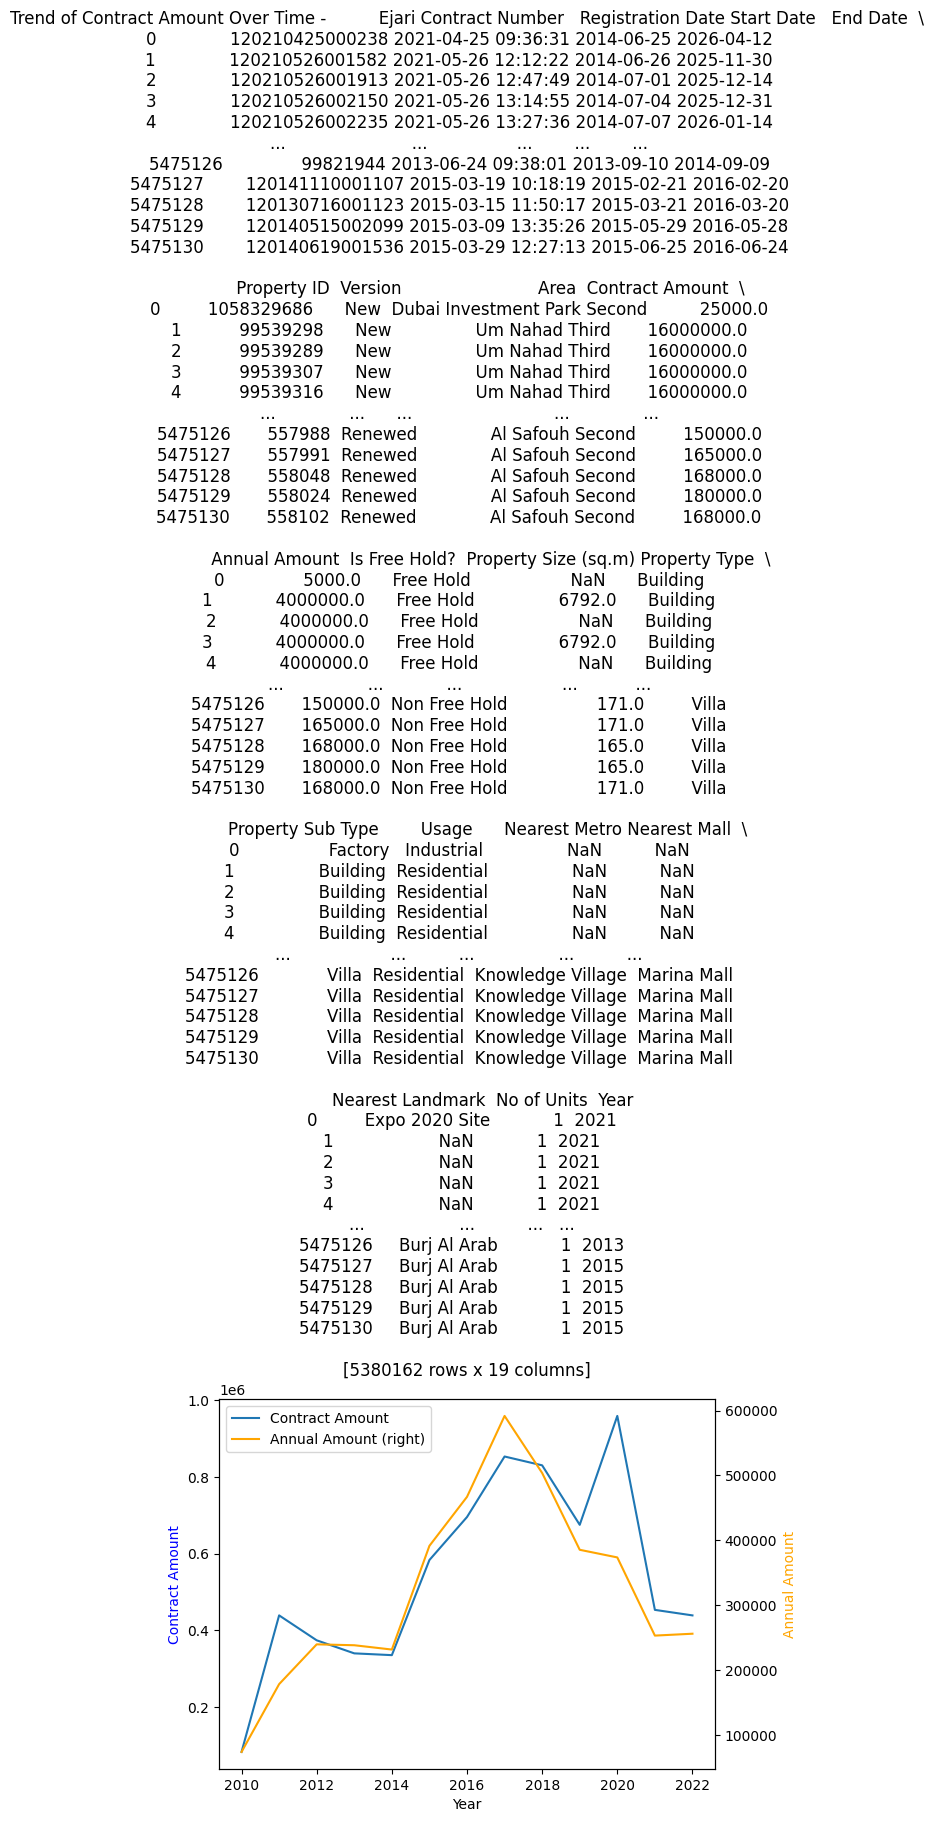

In [18]:

plots.plot_trends(
    property_rental_transactions_df, 
    main_col='Contract Amount', 
    time_col='Registration Date', 
    secondary_col='Annual Amount'
)


In [19]:
property_rental_transactions_df['Registration Date'].describe()

count                          5380162
mean     2017-12-12 00:47:45.615532544
min                2010-05-18 19:44:30
25%      2015-07-26 11:47:41.249999872
50%                2018-03-15 09:23:17
75%                2020-07-20 11:29:53
max                2022-06-03 12:25:51
Name: Registration Date, dtype: object

In [20]:
# Process the 'Transaction Date' column
property_transactions_df = plots.process_transaction_dates(property_transactions_df)

# Check the updates
property_transactions_df[['Transaction Date', 'Year', 'Month', 'Day', 'Hour']].head()



,Transaction Date,Year,Month,Day,Hour
0,2022-06-02 16:18:00,2022,6,2,16
1,2022-06-02 16:14:00,2022,6,2,16
2,2022-06-02 15:42:00,2022,6,2,15
3,2022-06-02 15:22:00,2022,6,2,15
4,2022-06-02 15:07:00,2022,6,2,15


In [21]:
property_transactions_df['Transaction Date'].describe()
# transactions_df['Transaction Date']

count                           995975
mean     2015-01-18 13:58:10.776414464
min                1995-03-07 00:00:00
25%                2011-02-28 13:40:00
50%                2015-02-19 19:01:00
75%                2019-02-26 13:36:00
max                2022-06-02 16:18:00
Name: Transaction Date, dtype: object

/Users/okpo/Desktop/Onward/18_dubai_real_estate_prediction/notebooks/../utils/plots.py:116: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x400 with 0 Axes>

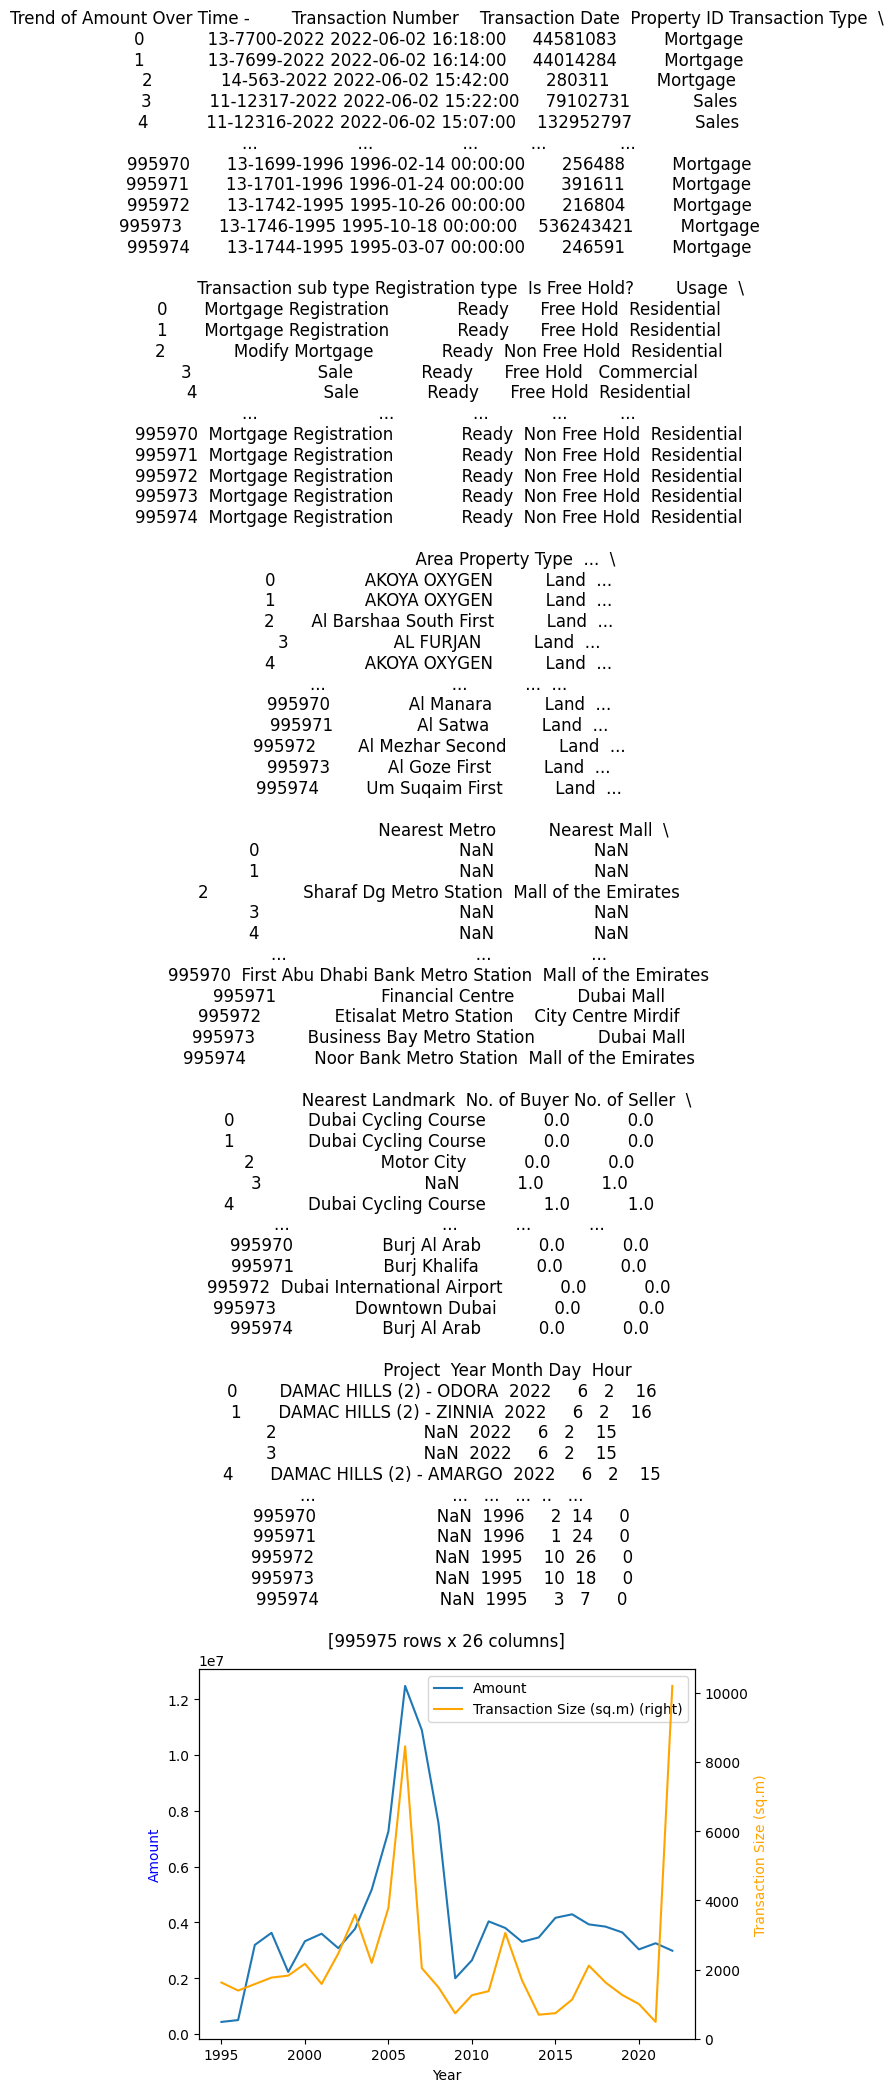

In [22]:
plots.plot_trends(
    property_transactions_df, 
    main_col='Amount', 
    time_col='Transaction Date', 
    secondary_col='Transaction Size (sq.m)'
)


#### 2d. Summary Statistics - Rent and Sales

- Property Transactions Summary Stats

In [23]:
property_transactions_df[['Transaction Type','Transaction sub type','Property Type','Property Sub Type']]


,Transaction Type,Transaction sub type,Property Type,Property Sub Type
0,Mortgage,Mortgage Registration,Land,Residential
1,Mortgage,Mortgage Registration,Land,Residential
2,Mortgage,Modify Mortgage,Land,Residential
3,Sales,Sale,Land,Commercial
4,Sales,Sale,Land,Residential
...,...,...,...,...
995970,Mortgage,Mortgage Registration,Land,Residential
995971,Mortgage,Mortgage Registration,Land,Residential
995972,Mortgage,Mortgage Registration,Land,Residential
995973,Mortgage,Mortgage Registration,Land,Residential


In [24]:
plots.compute_summary_statistics(property_transactions_df)


--- Summary Statistics ---
                            count          mean           std      min        25%          50%           75%           max
Property ID              995975.0  1.114824e+08  2.477860e+08  1458.00  601027.50  14943291.00  5.385910e+07  1.260767e+09
Amount                   995975.0  3.705480e+06  4.741460e+07    67.51  653800.00   1200000.00  2.203381e+06  1.142830e+10
Transaction Size (sq.m)  870248.0  1.868872e+03  3.887984e+05 -3984.08      75.06       132.02  3.223950e+02  3.421034e+08
Property Size (sq.m)     995972.0  1.908865e+03  4.169793e+05     0.00      73.26       123.81  2.689400e+02  3.421034e+08
No. of Buyer             995787.0  9.448356e-01  6.488847e+00     0.00       0.00         1.00  1.000000e+00  3.134000e+03
No. of Seller            995787.0  9.248112e-01  5.819718e+00     0.00       0.00         1.00  1.000000e+00  1.084000e+03
Year                     995975.0  2.014556e+03  4.814687e+00  1995.00    2011.00      2015.00  2.019000e+03  2

- We are however concerned with only Sales Transactions here

In [25]:
# Filter for Sales Transactions
sales_transactions_df = property_transactions_df[property_transactions_df['Transaction Type'] == 'Sales']

# Inspect the filtered data
print('Property Sales Transactions Dataframe:')
sales_transactions_df.head()


Property Sales Transactions Dataframe:


,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,...,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Project,Year,Month,Day,Hour
3,11-12317-2022,2022-06-02 15:22:00,79102731,Sales,Sale,Ready,Free Hold,Commercial,AL FURJAN,Land,...,NaN,NaN,NaN,1.0,1.0,NaN,2022,6,2,15
4,11-12316-2022,2022-06-02 15:07:00,132952797,Sales,Sale,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,NaN,NaN,Dubai Cycling Course,1.0,1.0,DAMAC HILLS (2) - AMARGO,2022,6,2,15
5,102-14693-2022,2022-06-02 14:56:00,1134745314,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,AL FURJAN,Unit,...,Ibn Battuta Metro Station,Ibn-e-Battuta Mall,Expo 2020 Site,0.0,1.0,Prime Residency 3,2022,6,2,14
6,102-14692-2022,2022-06-02 14:54:00,750930096,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,ARABIAN RANCHES III,Building,...,NaN,NaN,Hamdan Sports Complex,2.0,1.0,Arabian Ranches III - JOY,2022,6,2,14
8,11-12315-2022,2022-06-02 14:52:00,41160822,Sales,Sale,Ready,Free Hold,Residential,PALM JUMEIRAH,Unit,...,Palm Jumeirah,Marina Mall,Burj Al Arab,1.0,1.0,GOLDEN MILE,2022,6,2,14


In [26]:
print('Property Sales Transactions Distribution:')
sales_transactions_df['Transaction Type'].value_counts()

Property Sales Transactions Distribution:


Transaction Type
Sales       706096
Gifts            0
Mortgage         0
Name: count, dtype: int64

All Mortgage and Gift Transactions?

In [27]:
print('Property Sales Transactions Sub Type Distribution:')
sales_transactions_df[['Transaction sub type','Transaction Type']].value_counts()

Property Sales Transactions Sub Type Distribution:


Transaction sub type                        Transaction Type
Sale                                        Sales               320565
Sell - Pre registration                     Sales               252047
Delayed Sell                                Sales                77843
Lease to Own Registration                   Sales                26541
Development Registration                    Sales                11014
Sell Development                            Sales                 6979
Lease to Own Registration Pre-Registration  Sales                 4187
Development Registration Pre-Registration   Sales                 2834
Delayed Development                         Sales                 1132
Delayed Lease to Own Registration           Sales                 1106
Lease Development Registration              Sales                  467
Adding Land By Sell                         Sales                  442
Lease to Own on Development Registration    Sales                  287
Sale On Payment 

In [28]:
sales_transactions_df[sales_transactions_df['Transaction Type'] == 'Gift']

,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,...,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Project,Year,Month,Day,Hour


- Property Rentals Transactions Summary Stats

In [29]:
property_rental_transactions_df.columns

Index(['Ejari Contract Number', 'Registration Date', 'Start Date', 'End Date',
       'Property ID', 'Version', 'Area', 'Contract Amount', 'Annual Amount',
       'Is Free Hold?', 'Property Size (sq.m)', 'Property Type',
       'Property Sub Type', 'Usage', 'Nearest Metro', 'Nearest Mall',
       'Nearest Landmark', 'No of Units', 'Year'],
      dtype='object')

In [30]:
property_transactions_df[['Property Type','Property Sub Type']]


,Property Type,Property Sub Type
0,Land,Residential
1,Land,Residential
2,Land,Residential
3,Land,Commercial
4,Land,Residential
...,...,...
995970,Land,Residential
995971,Land,Residential
995972,Land,Residential
995973,Land,Residential


In [31]:
plots.compute_summary_statistics(property_rental_transactions_df)


--- Summary Statistics ---
                           count          mean           std      min           25%           50%           75%           max
Ejari Contract Number  5380162.0  1.211132e+14  7.343105e+13  10784.0  1.201401e+14  1.201807e+14  1.202206e+14  1.120211e+15
Property ID            5380162.0  3.997040e+08  7.922147e+08     -3.0  5.502030e+05  1.540166e+07  4.251070e+08  5.772906e+09
Contract Amount        5230073.0  6.241746e+05  8.635065e+06 -58697.0  4.200000e+04  6.500000e+04  1.251950e+05  4.200000e+09
Annual Amount          5066838.0  3.682194e+05  3.905977e+06      0.0  4.200000e+04  6.500000e+04  1.250000e+05  1.610378e+09
Property Size (sq.m)   2682260.0  1.586226e+04  2.494277e+06      0.0  2.500000e+01  7.100000e+01  1.370000e+02  9.300910e+08
No of Units            5380162.0  1.005361e+01  4.118212e+01      1.0  1.000000e+00  1.000000e+00  1.000000e+00  6.360000e+02
Year                   5380162.0  2.017460e+03  2.938219e+00   2010.0  2.015000e+03  2.018

In [32]:
# Inspect Rental Property Type Distribution
print('Rental Property Type Distribution')
property_rental_transactions_df['Property Type'].value_counts()


Rental Property Type Distribution


Property Type
Unit            4875116
Villa            421608
Virtual Unit      44457
Land              36185
Building           2796
Name: count, dtype: int64

- ***Uncover Key Insights***

We'll focus on uncovering insights specific to sales and rental trends:

Temporal Trends:

- Sales and rental activity by year, month, or quarter.
- Seasonal patterns or anomalies.

Spatial Insights:

- Most active areas for sales and rentals.
- Average transaction amounts by area or property type.

Price Trends:
- Median sales and rental prices over time.
- Correlation between property size and price.

**Visualization 1: Temporal Trends in Sales and Rentals**

- Objective: Identify trends in transaction volumes and median prices over time.
- Approach: Aggregate by year/month, compute metrics, and plot.

In [33]:
# Temporal Trends
sales_trends = sales_transactions_df.groupby('Year')['Amount'].median()
rental_trends = property_rental_transactions_df.groupby('Year')['Annual Amount'].median()

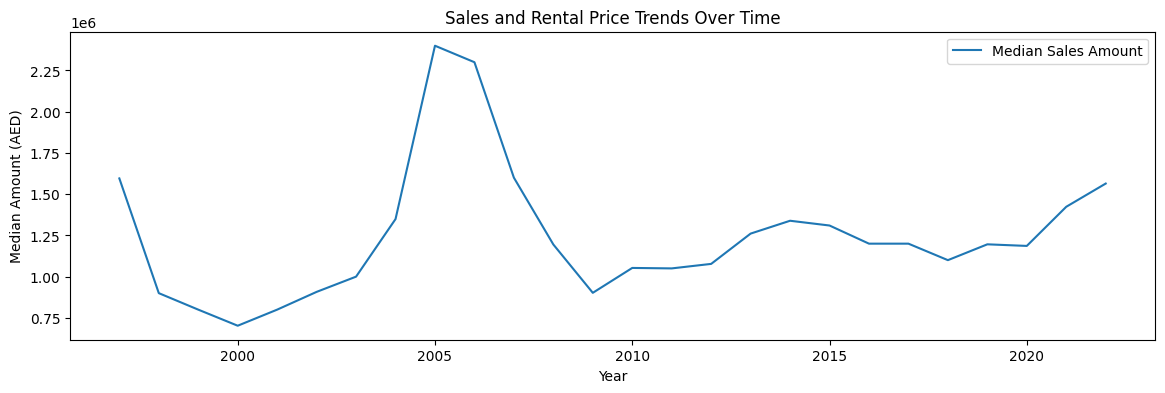

In [34]:

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.plot(sales_trends, label='Median Sales Amount')
# plt.plot(rental_trends, label='Median Rental Amount')
plt.xlabel('Year')
plt.ylabel('Median Amount (AED)')
plt.title('Sales and Rental Price Trends Over Time')
plt.legend()
plt.show()


**Visualization 2: Spatial Distribution of Transactions**
- Objective: Identify high-activity areas for sales and rentals.
- Approach: Aggregate data by Area and visualize counts or sums.

In [35]:
# Count transactions by area
sales_area = sales_transactions_df['Area'].value_counts().head(10)
rental_area = property_rental_transactions_df['Area'].value_counts().head(10)

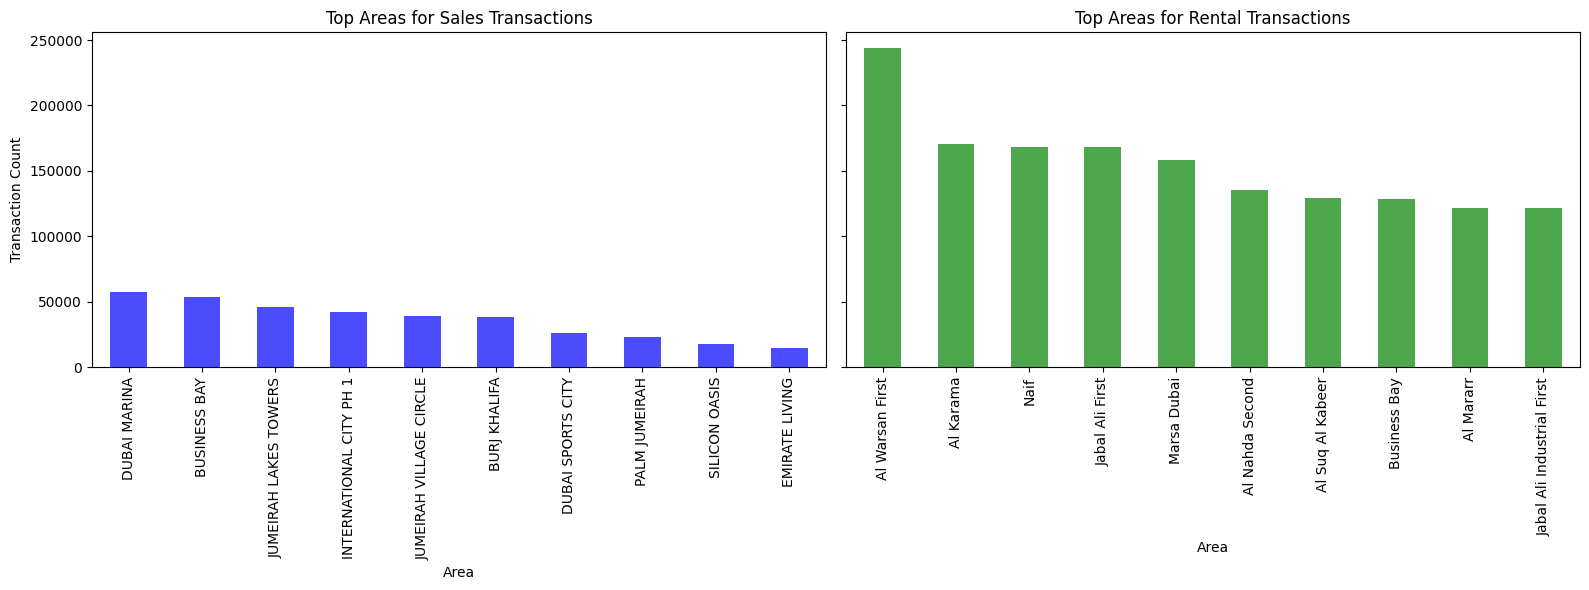

In [36]:
# Plot bar chart for top areas
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sales_area.plot(kind='bar', ax=ax[0], color='blue', alpha=0.7)
rental_area.plot(kind='bar', ax=ax[1], color='green', alpha=0.7)

ax[0].set_title('Top Areas for Sales Transactions')
ax[1].set_title('Top Areas for Rental Transactions')
ax[0].set_ylabel('Transaction Count')
ax[0].set_xlabel('Area')
ax[1].set_xlabel('Area')
plt.tight_layout()
plt.show()


**Visualization 3: Price Distribution by Property Type**
- Objective: Explore price variation across different property types for both datasets.

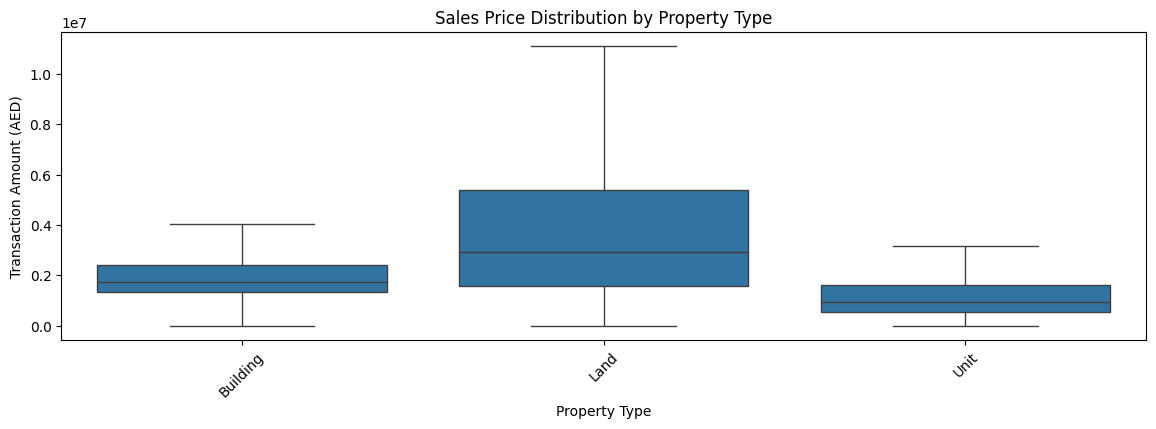

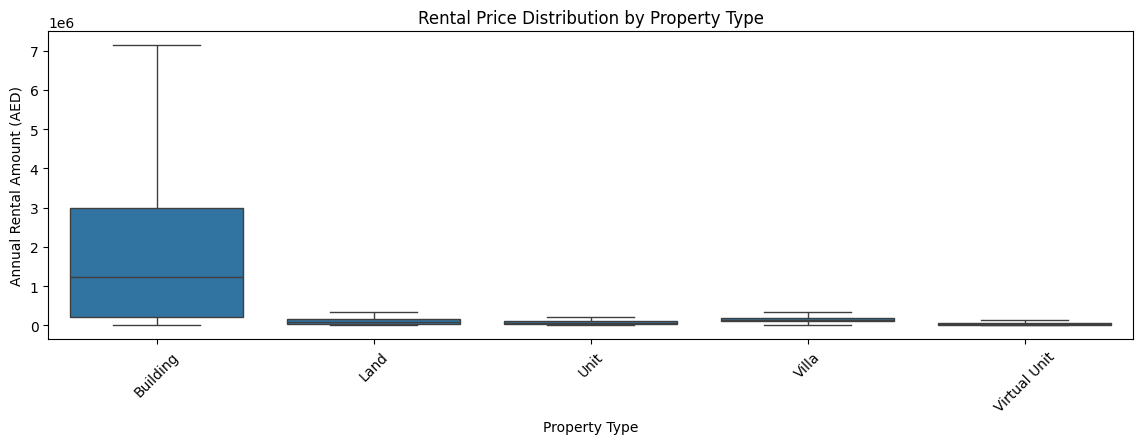

In [37]:
# Boxplots of prices by property type
plt.figure(figsize=(14, 4))
sns.boxplot(data=sales_transactions_df, x='Property Type', y='Amount', showfliers=False)
plt.title('Sales Price Distribution by Property Type')
plt.ylabel('Transaction Amount (AED)')
plt.xlabel('Property Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 4))
sns.boxplot(data=property_rental_transactions_df, x='Property Type', y='Annual Amount', showfliers=False)
plt.title('Rental Price Distribution by Property Type')
plt.ylabel('Annual Rental Amount (AED)')
plt.xlabel('Property Type')
plt.xticks(rotation=45)
plt.show()


**Visualization 4: Relationship Between Property Size and Price**
- Objective: Analyze the correlation between property size and price for sales and rentals

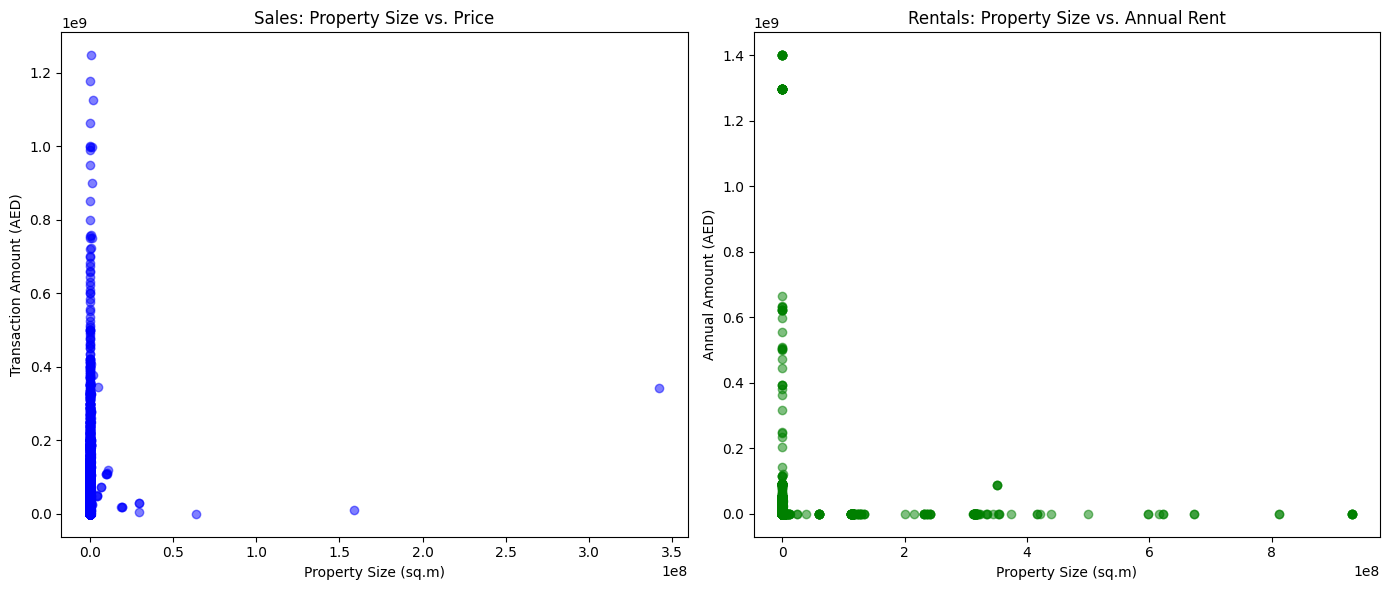

In [38]:
# Scatter plots for property size vs. price
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(sales_transactions_df['Property Size (sq.m)'], sales_transactions_df['Amount'], alpha=0.5, color='blue')
ax[0].set_title('Sales: Property Size vs. Price')
ax[0].set_xlabel('Property Size (sq.m)')
ax[0].set_ylabel('Transaction Amount (AED)')

ax[1].scatter(property_rental_transactions_df['Property Size (sq.m)'], property_rental_transactions_df['Annual Amount'], alpha=0.5, color='green')
ax[1].set_title('Rentals: Property Size vs. Annual Rent')
ax[1].set_xlabel('Property Size (sq.m)')
ax[1].set_ylabel('Annual Amount (AED)')

plt.tight_layout()
plt.show()


**Visualization 5: Temporal Trends in Transaction Volumes**
 - Objective: Compare the number of sales vs. rental transactions over time.

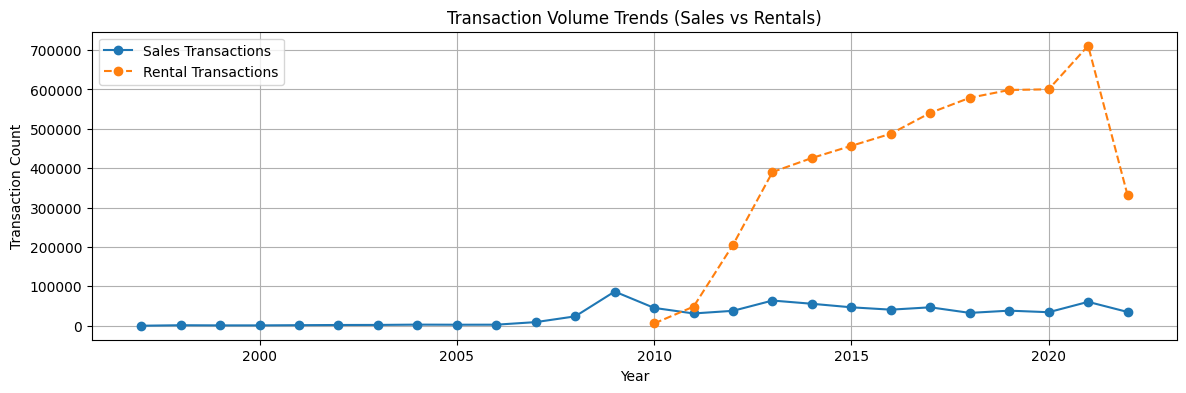

,Year,Sales Transactions,Rental Transactions
0,1997,56,0.0
1,1998,1309,0.0
2,1999,899,0.0
3,2000,922,0.0
4,2001,1440,0.0
5,2002,1909,0.0
6,2003,2071,0.0
7,2004,2841,0.0
8,2005,2596,0.0
9,2006,2691,0.0


In [39]:
# Count transactions per year
sales_volume = sales_transactions_df['Year'].value_counts().sort_index()
rental_volume = property_rental_transactions_df['Year'].value_counts().sort_index()

# pd.DataFrame(data=[sales_volume,rental_volume]).T
transaction_trends_df = pd.DataFrame({
    'Sales Transactions': sales_volume,
    'Rental Transactions': rental_volume
}).fillna(0)

transaction_trends_df.reset_index(inplace=True)
transaction_trends_df.rename(columns={'index': 'Year'}, inplace=True)

# Plot transaction counts
plt.figure(figsize=(14, 4))
plt.plot(sales_volume, label='Sales Transactions', marker='o')
plt.plot(rental_volume, label='Rental Transactions', marker='o', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Transaction Count')
plt.title('Transaction Volume Trends (Sales vs Rentals)')
plt.legend()
plt.grid()
plt.show()


transaction_trends_df


**Observations and Analysis**

1. **Transaction Growth Patterns**:
   - Early Years (1997–2009): Sales dominate, with significant growth starting in 2007, possibly driven by Dubai's property boom.
   - Rentals become visible in 2010, with steady and rapid growth through 2021, indicating increasing demand for rental properties.

2. **Peak and Decline**:
   - **Sales**: A notable peak occurs in 2009 (86,781 transactions), followed by a decline post-2014, possibly due to market saturation or regulatory impacts.
   - **Rentals**: Show consistent growth, peaking in 2021 with 710,876 transactions, reflecting a high demand for rentals post-pandemic.

3. **Post-2021 Trends**:
   - Both sales and rentals show a decline in 2022. Is this tied to economic policy changes or shifting buyer/renter preferences?

4. **Comparative Dominance**:
   - Sales led the market until 2010, after which rentals dominated, suggesting a major shift in market dynamics.

---


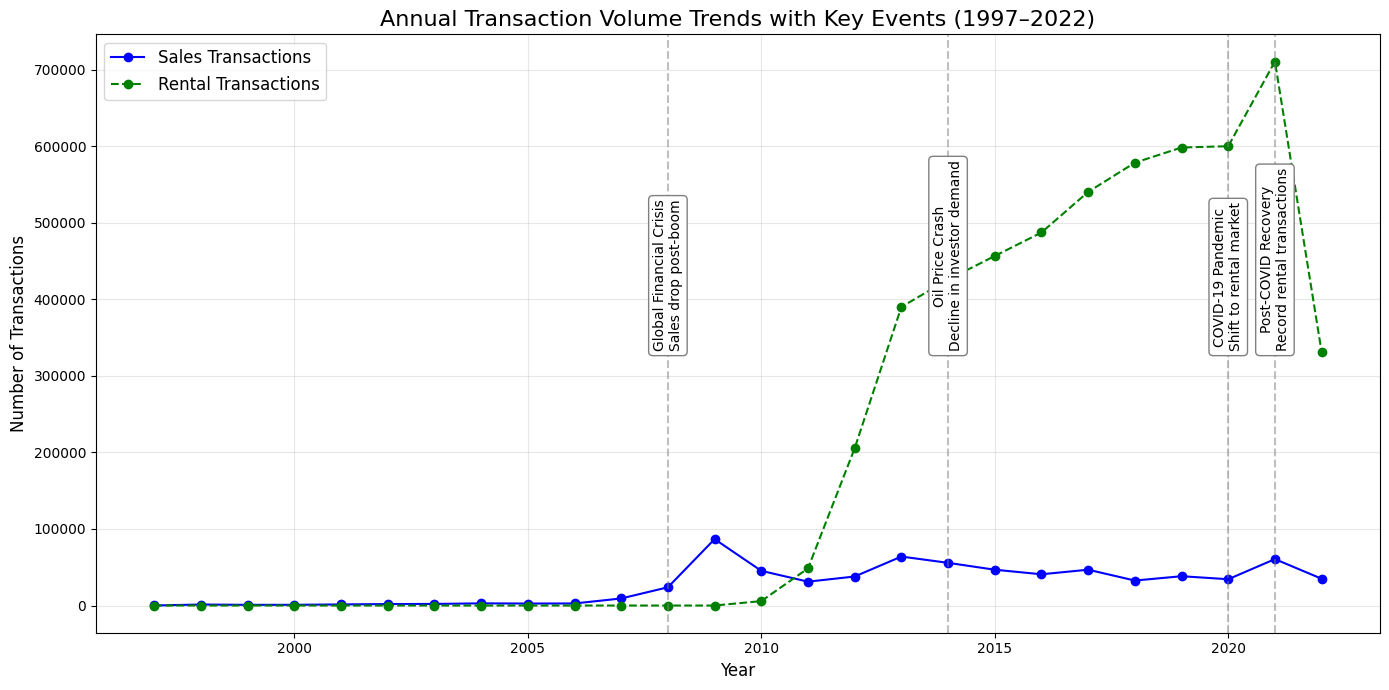

In [40]:
# Plot the trends for sales and rental transactions
plt.figure(figsize=(14, 7))

# Sales Transactions Trend
plt.plot(
    transaction_trends_df['Year'], 
    transaction_trends_df['Sales Transactions'], 
    label='Sales Transactions', marker='o', linestyle='-', color='blue'
)

# Rental Transactions Trend
plt.plot(
    transaction_trends_df['Year'], 
    transaction_trends_df['Rental Transactions'], 
    label='Rental Transactions', marker='o', linestyle='--', color='green'
)

# Annotate Key Historical Events
annotations = {
    2008: "Global Financial Crisis\nSales drop post-boom",
    2014: "Oil Price Crash\nDecline in investor demand",
    2020: "COVID-19 Pandemic\nShift to rental market",
    2021: "Post-COVID Recovery\nRecord rental transactions",
}

for year, text in annotations.items():
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
    plt.text(
        x=year, 
        y=plt.ylim()[1] * 0.45, 
        s=text, 
        color='black', 
        fontsize=10, 
        rotation=90, 
        ha='center', 
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white')
    )

# Add labels, title, and legend
plt.title('Annual Transaction Volume Trends with Key Events (1997–2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Key Observations to Add

- 1997–2009: Sales dominated as Dubai emerged as a global real estate hub. The Global Financial Crisis in 2008 ended this boom, with sales dropping sharply.
- 2010–2021: Rentals gained traction, reflecting Dubai's evolving role as an expatriate-friendly city with a transient population.
- 2020–2021: COVID-19 disrupted the market, leading to temporary declines in sales and rental transactions. A post-pandemic recovery in 2021 saw record rental transactions.
- 2022 Decline: Both sales and rentals show a drop. Hypotheses include economic recalibration, regulatory changes, or a temporary market adjustment.

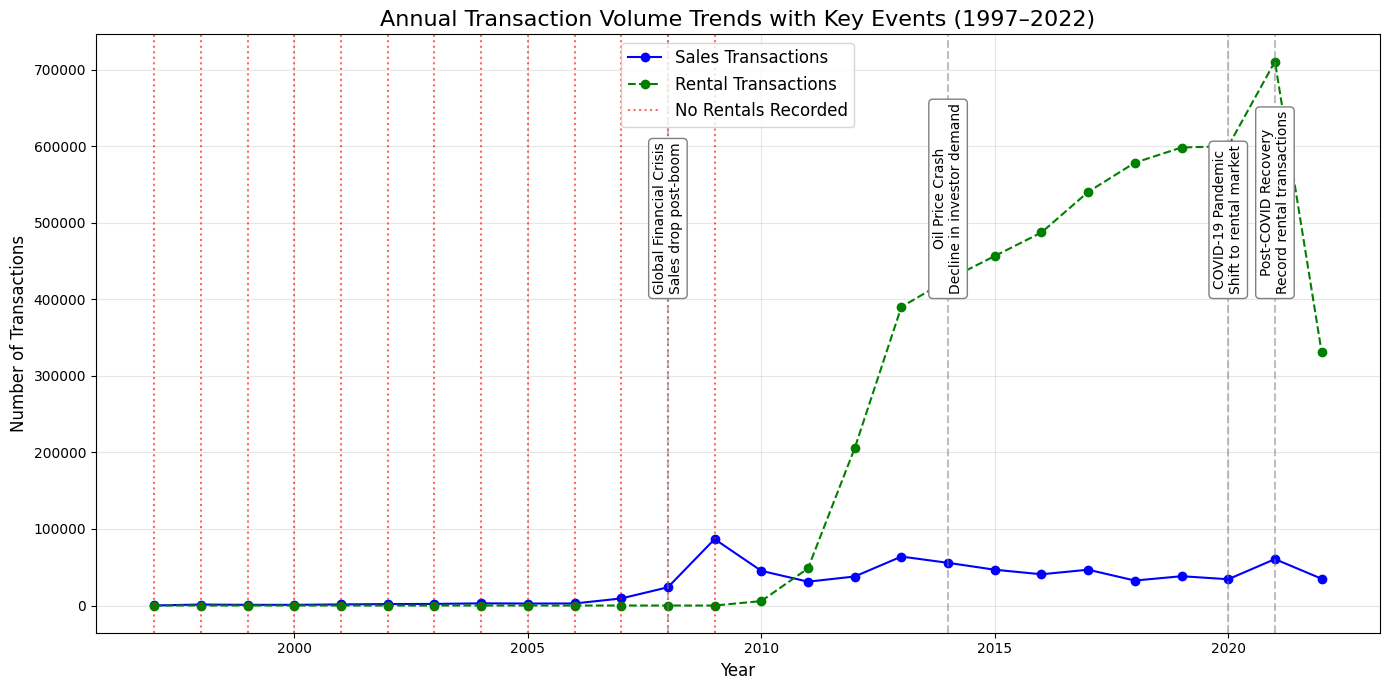

In [41]:
# Highlight years with zero rental data (1997–2009)
zero_rental_years = (transaction_trends_df['Rental Transactions'] == 0)

plt.figure(figsize=(14, 7))

# Plot Sales Transactions
plt.plot(
    transaction_trends_df['Year'], 
    transaction_trends_df['Sales Transactions'], 
    label='Sales Transactions', marker='o', linestyle='-', color='blue'
)

# Plot Rental Transactions
plt.plot(
    transaction_trends_df['Year'], 
    transaction_trends_df['Rental Transactions'], 
    label='Rental Transactions', marker='o', linestyle='--', color='green'
)

# Annotate years with zero rentals
for idx in transaction_trends_df[zero_rental_years].index:
    plt.axvline(
        x=transaction_trends_df.loc[idx, 'Year'], 
        color='red', 
        linestyle=':', 
        alpha=0.6, 
        label='No Rentals Recorded' if idx == 0 else ""
    )

# Add other annotations (as earlier)
annotations = {
    2008: "Global Financial Crisis\nSales drop post-boom",
    2014: "Oil Price Crash\nDecline in investor demand",
    2020: "COVID-19 Pandemic\nShift to rental market",
    2021: "Post-COVID Recovery\nRecord rental transactions",
}

for year, text in annotations.items():
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
    plt.text(
        x=year, 
        y=plt.ylim()[1] * 0.55, 
        s=text, 
        color='black', 
        fontsize=10, 
        rotation=90, 
        ha='center', 
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white')
    )

# Add title, labels, legend
plt.title('Annual Transaction Volume Trends with Key Events (1997–2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


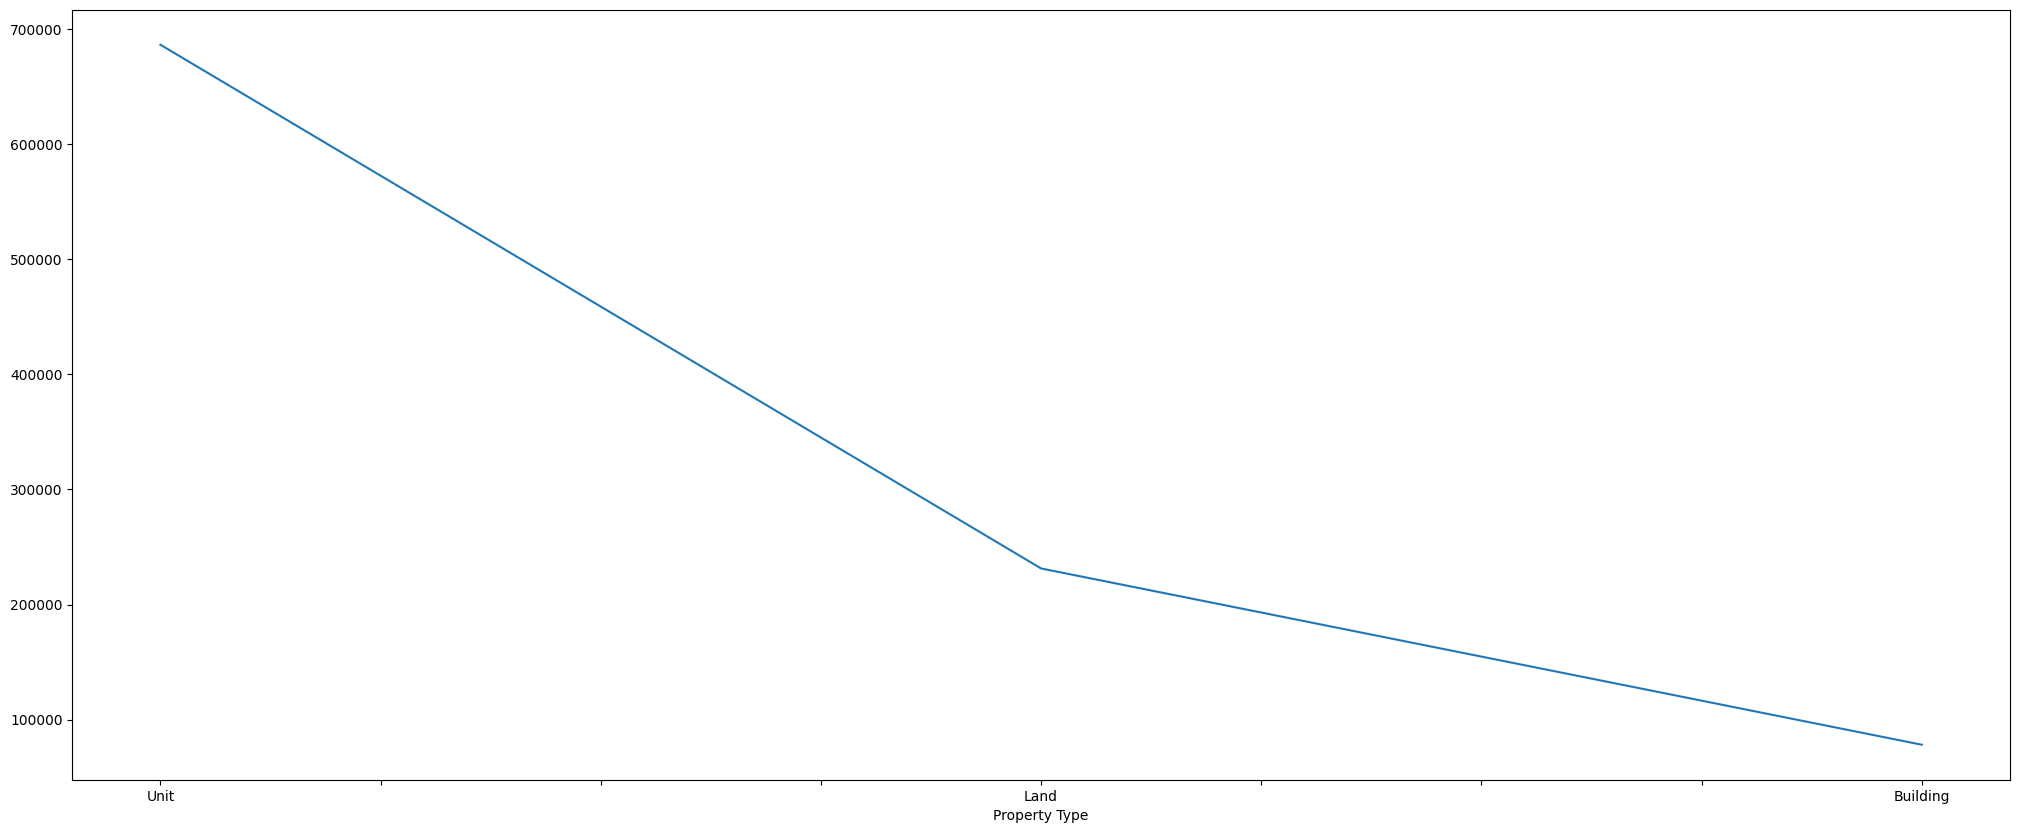

In [42]:
property_transactions_df['Property Type'].value_counts().plot(figsize=(25, 10))
plt.show()

In [43]:
property_rental_transactions_df

,Ejari Contract Number,Registration Date,Start Date,End Date,Property ID,Version,Area,Contract Amount,Annual Amount,Is Free Hold?,Property Size (sq.m),Property Type,Property Sub Type,Usage,Nearest Metro,Nearest Mall,Nearest Landmark,No of Units,Year
0,120210425000238,2021-04-25 09:36:31,2014-06-25,2026-04-12,1058329686,New,Dubai Investment Park Second,25000.0,5000.0,Free Hold,NaN,Building,Factory,Industrial,NaN,NaN,Expo 2020 Site,1,2021
1,120210526001582,2021-05-26 12:12:22,2014-06-26,2025-11-30,99539298,New,Um Nahad Third,16000000.0,4000000.0,Free Hold,6792.0,Building,Building,Residential,NaN,NaN,NaN,1,2021
2,120210526001913,2021-05-26 12:47:49,2014-07-01,2025-12-14,99539289,New,Um Nahad Third,16000000.0,4000000.0,Free Hold,NaN,Building,Building,Residential,NaN,NaN,NaN,1,2021
3,120210526002150,2021-05-26 13:14:55,2014-07-04,2025-12-31,99539307,New,Um Nahad Third,16000000.0,4000000.0,Free Hold,6792.0,Building,Building,Residential,NaN,NaN,NaN,1,2021
4,120210526002235,2021-05-26 13:27:36,2014-07-07,2026-01-14,99539316,New,Um Nahad Third,16000000.0,4000000.0,Free Hold,NaN,Building,Building,Residential,NaN,NaN,NaN,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475126,99821944,2013-06-24 09:38:01,2013-09-10,2014-09-09,557988,Renewed,Al Safouh Second,150000.0,150000.0,Non Free Hold,171.0,Villa,Villa,Residential,Knowledge Village,Marina Mall,Burj Al Arab,1,2013
5475127,120141110001107,2015-03-19 10:18:19,2015-02-21,2016-02-20,557991,Renewed,Al Safouh Second,165000.0,165000.0,Non Free Hold,171.0,Villa,Villa,Residential,Knowledge Village,Marina Mall,Burj Al Arab,1,2015
5475128,120130716001123,2015-03-15 11:50:17,2015-03-21,2016-03-20,558048,Renewed,Al Safouh Second,168000.0,168000.0,Non Free Hold,165.0,Villa,Villa,Residential,Knowledge Village,Marina Mall,Burj Al Arab,1,2015
5475129,120140515002099,2015-03-09 13:35:26,2015-05-29,2016-05-28,558024,Renewed,Al Safouh Second,180000.0,180000.0,Non Free Hold,165.0,Villa,Villa,Residential,Knowledge Village,Marina Mall,Burj Al Arab,1,2015


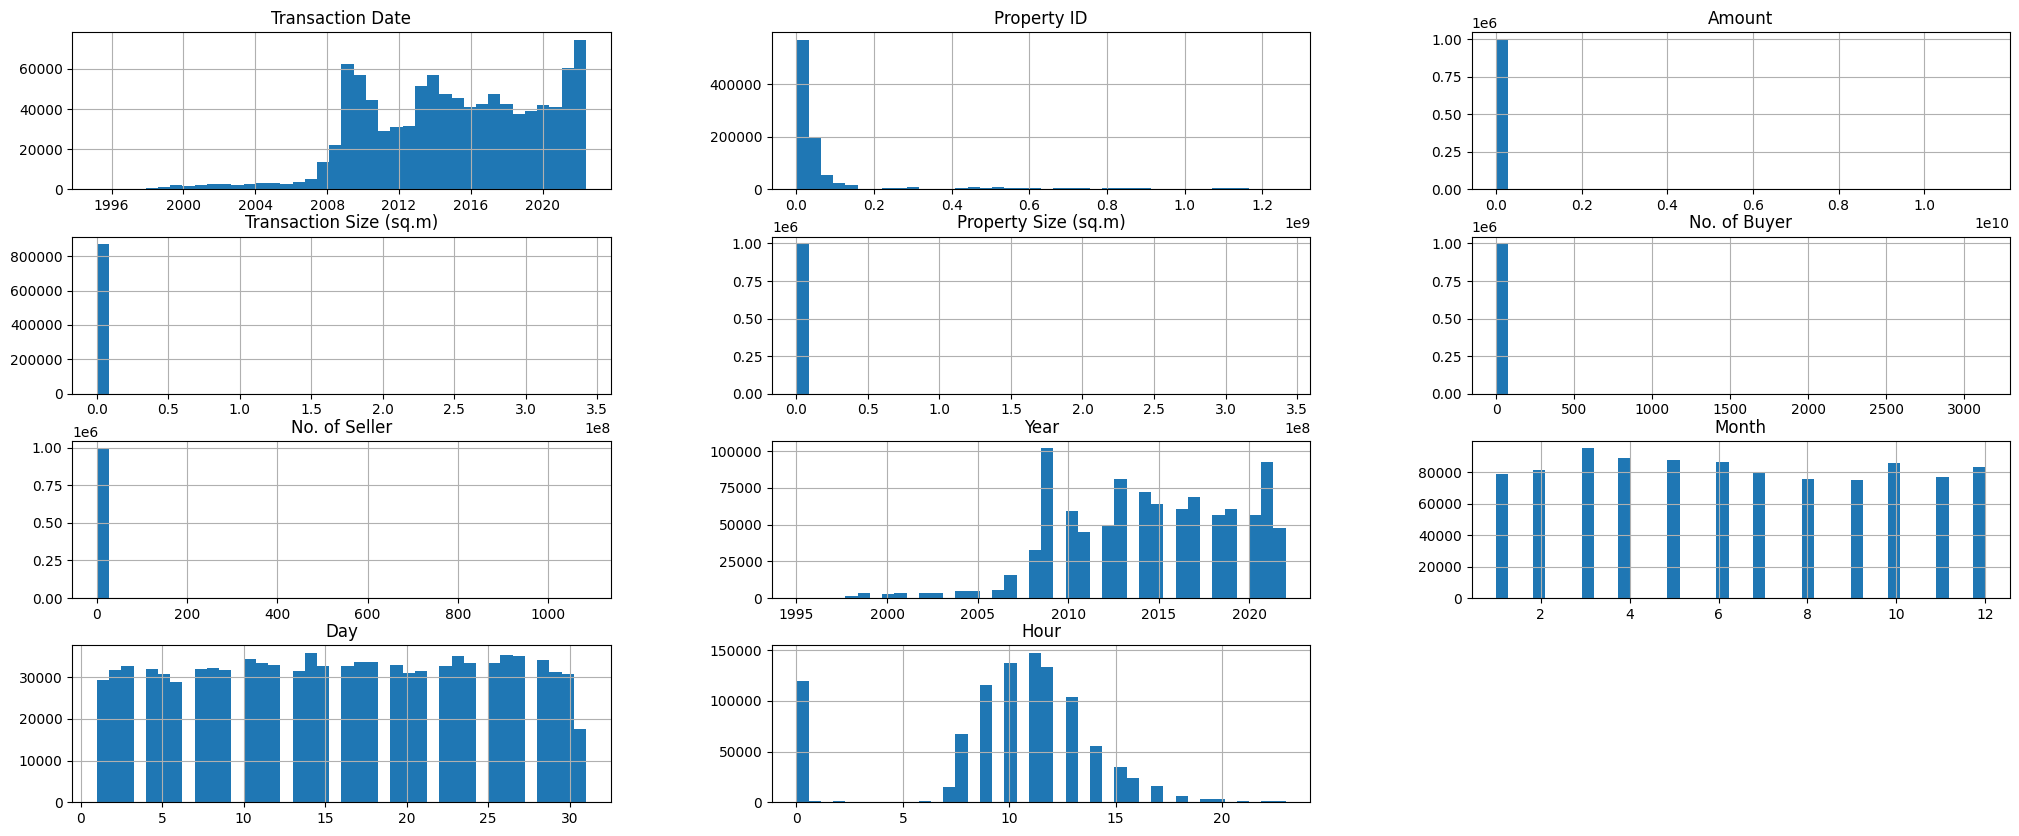

In [44]:
property_transactions_df.hist(figsize=(25, 10), bins=40)
plt.show()

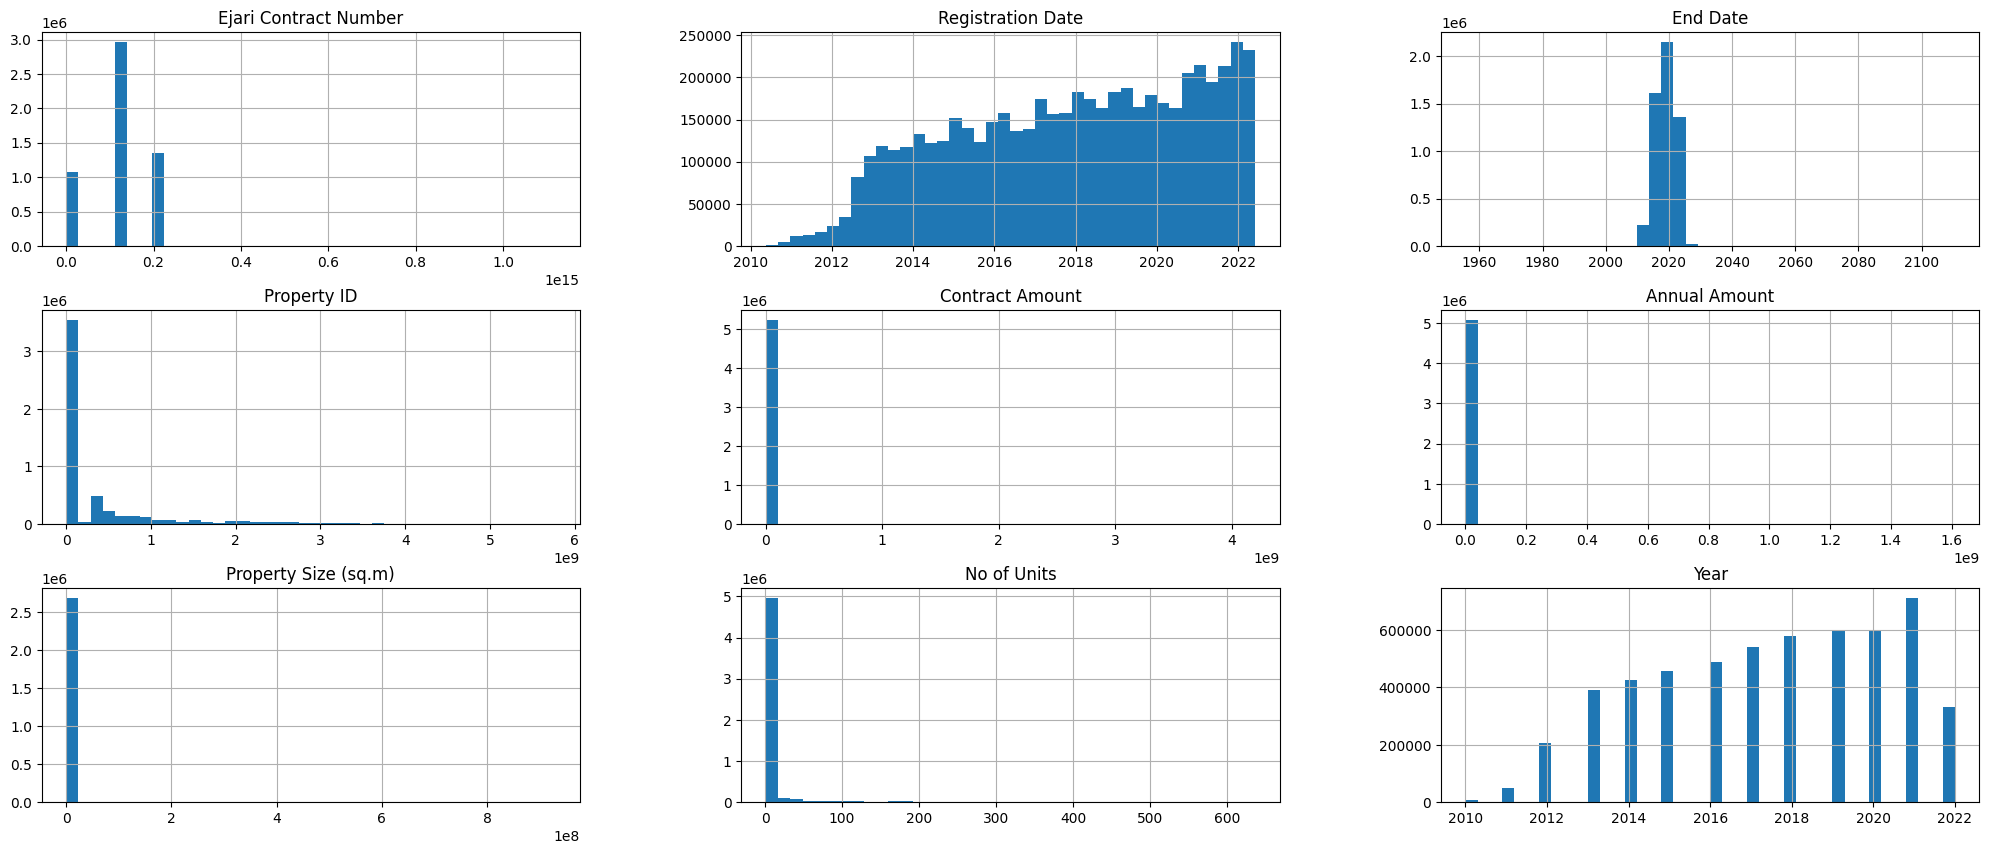

In [45]:
property_rental_transactions_df.hist(figsize=(25, 10), bins=40)
plt.show()

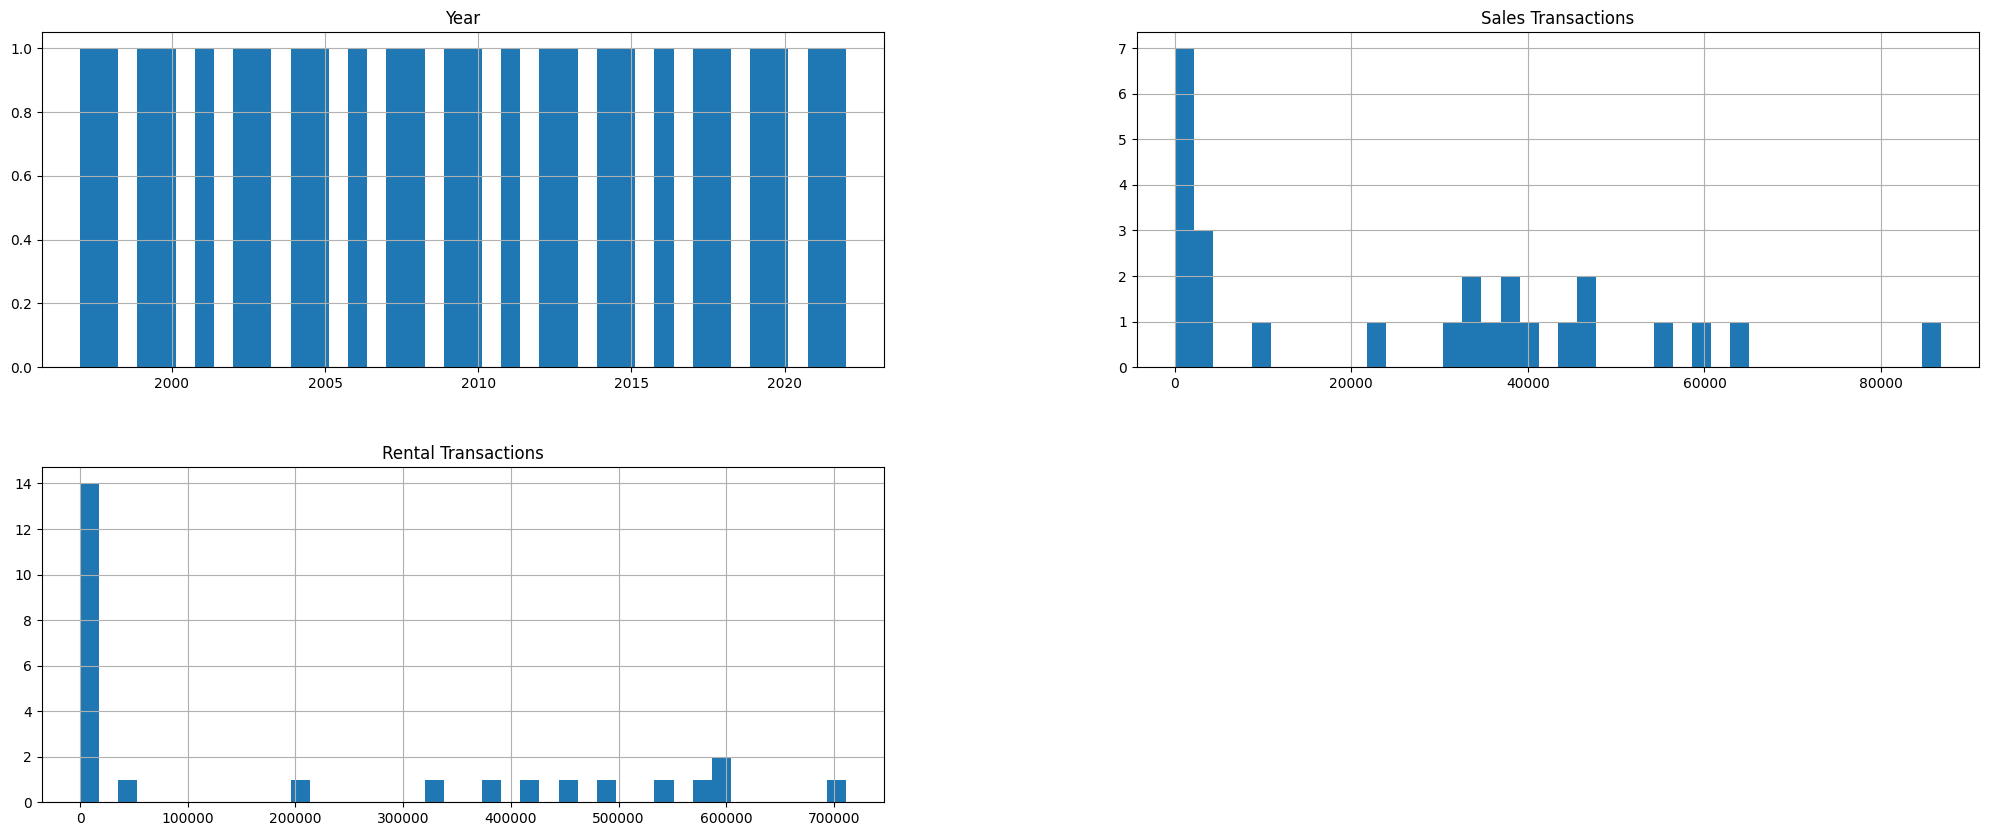

In [46]:
transaction_trends_df.hist(figsize=(25, 10), bins=40)
plt.show()

**Code for Subcategory Analysis**
1. Rental Data by Property Type:

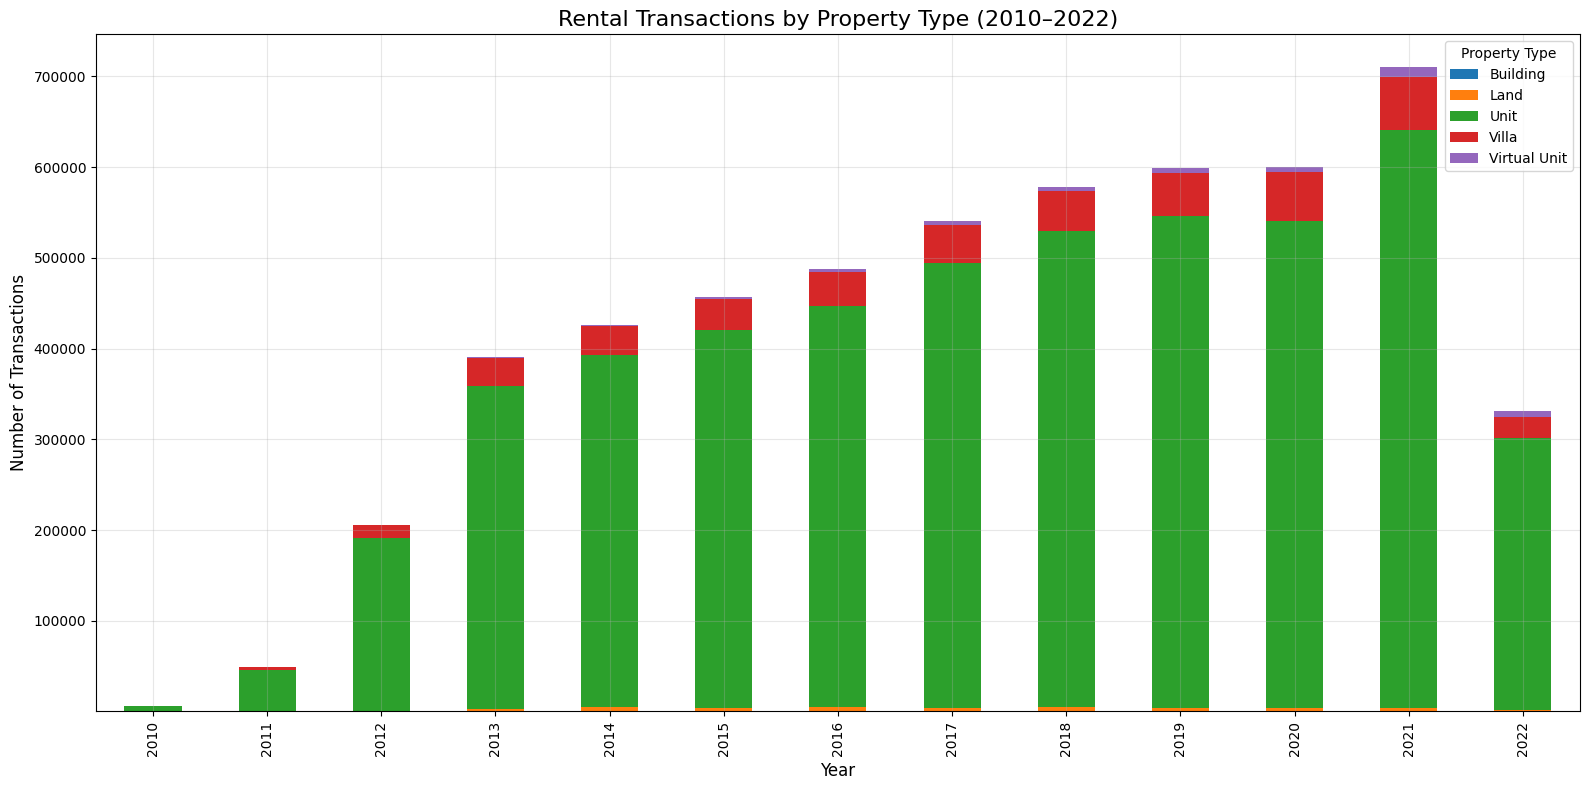

In [47]:
# Group by property type and year for rentals
rental_subcategories = (
    property_rental_transactions_df.groupby(['Year', 'Property Type'],observed=False)['Ejari Contract Number']
    .count()
    .unstack()
    .fillna(0)
)

rental_subcategories.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title("Rental Transactions by Property Type (2010–2022)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.legend(title="Property Type", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


2. Sales Data by Freehold Type:

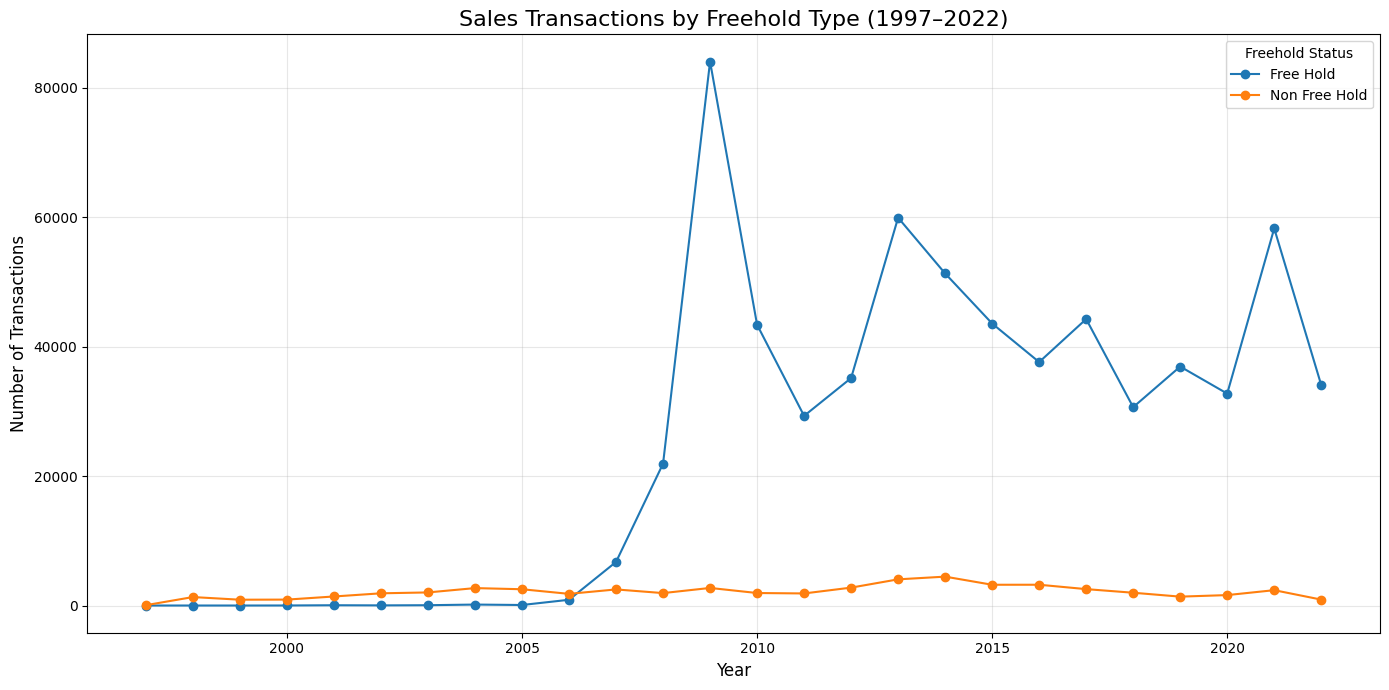

In [48]:
# Group by year and freehold status for sales
sales_freehold_analysis = (
    sales_transactions_df.groupby(['Year', 'Is Free Hold?'], observed=False)['Transaction Number']
    .count()
    .unstack()
    .fillna(0)
)

sales_freehold_analysis.plot(kind='line', figsize=(14, 7), marker='o')
plt.title("Sales Transactions by Freehold Type (1997–2022)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.legend(title="Freehold Status", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### 4. Micro-economics Factors Influence

**Integrating Macroeconomic Factors into the Analysis**  

We can leverage the additional datasets provided to analyze how macroeconomic factors (GDP, tourism, population, currency strength, etc.) influence Dubai's real estate market:  

---

**Steps for Analysis**  

**1. Data Preparation**  
- **Align Time Periods**: Ensure all datasets (macroeconomic indicators, sales, rentals) are aligned by year or quarter for consistent comparisons.  
- **Aggregate Transactions**: Summarize the sales and rental transaction data at the same time granularity (e.g., yearly, quarterly).  

**2. Feature Engineering**  
- **GDP Growth**: Calculate GDP growth rates (constant and current) to understand economic trends.  
- **Tourism Growth**: Use indicators like the number of visitors, average stay duration, and region-wise ratings.  
- **Population Growth**: Analyze population estimates to understand demand drivers.  
- **Currency Strength**: Assess AED exchange rate trends for insights into investor behavior.  
- **Energy Metrics**: Include oil prices (if available) as a proxy for broader economic conditions.  

**3. Visualization and Correlation Analysis**  
- **Trend Analysis**: Plot macroeconomic factors alongside real estate transactions to observe relationships.  
- **Correlation Matrix**: Compute correlations between macroeconomic factors and transaction volumes.  


---


#### 4a.  Summary Statistics Microeconomics Factors

- GDP Quarterly Constant Prices Summary Stats

In [49]:
gdp_quarterly_constant_df.head(2)

,DATAFLOW,REF_AREA,FREQ,UNIT_MEASURE,SOURCE_DETAIL,MEASURE,QUARTER,QGDP_SYS,QGDP_UNIT,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2012,6029.460989,0
1,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2013,6516.431786,0


In [50]:
num_features = gdp_quarterly_constant_df.select_dtypes(include="number").columns
gdp_quarterly_constant_df[num_features]

,TIME_PERIOD,OBS_VALUE,DECIMALS
0,2012,6029.460989,0
1,2013,6516.431786,0
2,2014,7282.519220,0
3,2015,5581.622819,0
4,2016,6507.318473,0
...,...,...,...
1915,2019,-0.492972,1
1916,2020,-9.141739,1
1917,2021,3.444517,1
1918,2022,9.629000,1


In [51]:
plots.compute_summary_statistics(gdp_quarterly_constant_df)



--- Summary Statistics ---
              count          mean           std          min          25%          50%          75%          max
TIME_PERIOD  1920.0   2018.000000      3.488984  2012.000000  2015.000000  2018.000000   2021.00000    2024.0000
OBS_VALUE    1920.0  33871.691457  84704.603183   -50.998461     4.703341  1719.233685  19854.47116  449633.4527
DECIMALS     1920.0      0.479167      0.499696     0.000000     0.000000     0.000000      1.00000       1.0000

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
REF_AREA                      0.0
FREQ                          0.0
UNIT_MEASURE                  0.0
SOURCE_DETAIL                 0.0
MEASURE                       0.0
QUARTER                       0.0
QGDP_SYS                      0.0
QGDP_UNIT                     0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0
DECIMALS                      0.0


- GDP Quarterly Current Prices Summary Stats

In [52]:
gdp_quarterly_current_df.head(2)

,DATAFLOW,REF_AREA,FREQ,UNIT_MEASURE,SOURCE_DETAIL,MEASURE,QUARTER,QGDP_SYS,QGDP_UNIT,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_QGDP_CUR(1.8.0),AE,Q,PERCENT,FCSC,NFC,Q3,CUR,GWTH_RATE,2013,4.355075,1
1,FCSA:DF_QGDP_CUR(1.8.0),AE,Q,PERCENT,FCSC,NFC,Q3,CUR,GWTH_RATE,2014,4.394883,1


In [53]:
plots.compute_summary_statistics(gdp_quarterly_current_df)


--- Summary Statistics ---
              count          mean           std          min          25%          50%           75%          max
TIME_PERIOD  1920.0   2018.000000      3.488984  2012.000000  2015.000000  2018.000000   2021.000000    2024.0000
OBS_VALUE    1920.0  35877.089588  89844.504067   -66.978072     5.387548  2087.586568  21518.734995  506021.1521
DECIMALS     1920.0      0.479167      0.499696     0.000000     0.000000     0.000000      1.000000       1.0000

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
REF_AREA                      0.0
FREQ                          0.0
UNIT_MEASURE                  0.0
SOURCE_DETAIL                 0.0
MEASURE                       0.0
QUARTER                       0.0
QGDP_SYS                      0.0
QGDP_UNIT                     0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0
DECIMALS                      0.0


- Tourism Indicators Summary Stats

In [54]:

tourism_indicators_df.head(2)

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1985,318484.0
1,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1986,298504.0


In [55]:
plots.compute_summary_statistics(tourism_indicators_df)


--- Summary Statistics ---
             count          mean           std     min       25%        50%         75%           max
TIME_PERIOD  201.0  2.004488e+03  1.292482e+01  1976.0    1993.0     2003.0      2017.0  2.022000e+03
OBS_VALUE    201.0  3.037453e+09  7.852964e+09     2.0  298504.0  2108739.0  73854531.0  3.780222e+10

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
H_TYPE                        0.0
H_INDICATOR                   0.0
GUEST_REGION                  0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0


In [56]:
tourism_indicators_df.head(2)

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1985,318484.0
1,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1986,298504.0


- Tourism Regions Summary Stats

In [57]:
tourism_regions_df.head(2)

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_GUEST_REGION(4.3.0),H,NUMBER,AE,A,_Z,GHH,OC,FCSC,2015,399751
1,FCSA:DF_GUEST_REGION(4.3.0),H,NUMBER,AE,A,_Z,GHH,OC,FCSC,2016,380717


In [58]:
plots.compute_summary_statistics(tourism_regions_df)


--- Summary Statistics ---
             count          mean           std     min       25%       50%        75%         max
TIME_PERIOD  664.0  2.001488e+03  1.312832e+01  1979.0    1990.0    2000.5     2014.0      2022.0
OBS_VALUE    664.0  3.906856e+06  9.996992e+06  1628.0  221386.5  835121.0  3155793.0  91461979.0

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
H_TYPE                        0.0
H_INDICATOR                   0.0
GUEST_REGION                  0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0


- Tourism Ratings Summary Stats

In [59]:
tourism_ratings_df.head(2)

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_HOT_TYPE(4.3.0),H,NUMBER,AE,A,_T,EST,_Z,FCSC,2014,1027
1,FCSA:DF_HOT_TYPE(4.3.0),H,NUMBER,AE,A,_T,EST,_Z,FCSC,2015,1056


In [60]:
plots.compute_summary_statistics(tourism_ratings_df)


--- Summary Statistics ---
             count      mean           std     min      25%     50%      75%       max
TIME_PERIOD  400.0   2001.28     14.737183  1975.0  1988.00  2001.0   2016.0    2022.0
OBS_VALUE    400.0  14942.34  34407.242885     3.0   106.75   468.0  10305.5  203948.0

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
H_TYPE                        0.0
H_INDICATOR                   0.0
GUEST_REGION                  0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0


- Population Estimates Summary Stats

In [61]:
plots.compute_summary_statistics(pop_estimates_df)


--- Summary Statistics ---
             count          mean           std      min       25%        50%        75%         max
TIME_PERIOD  162.0  1.996500e+03  1.563411e+01   1970.0    1983.0     1996.5     2010.0      2023.0
OBS_VALUE    162.0  2.646262e+06  2.594193e+06  86318.0  745767.0  1704024.5  3543425.0  10678556.0

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
POP_IND                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
GENDER                        0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0


- Population Indicators Summary Stats

In [62]:
pop_indicators_df.head(2)

,DATAFLOW,MEASURE,POP_IND,UNIT_MEASURE,REF_AREA,FREQ,GENDER,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_POP_IND(2.7.0),POPIND,MED,YEARS,AE,A,_Z,FCSC,2019,31.3,1
1,FCSA:DF_POP_IND(2.7.0),POPIND,MED,YEARS,AE,A,_Z,FCSC,2020,32.8,1


In [63]:
plots.compute_summary_statistics(pop_indicators_df)


--- Summary Statistics ---
             count         mean        std       min       25%      50%       75%     max
TIME_PERIOD   18.0  2019.611111   0.501631  2019.000  2019.000  2020.00  2020.000  2020.0
OBS_VALUE     18.0    67.997056  66.254497     2.057    20.885    33.15    81.025   229.9
DECIMALS      18.0     1.000000   0.000000     1.000     1.000     1.00     1.000     1.0

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
POP_IND                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
GENDER                        0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0
DECIMALS                      0.0


In [64]:
gdp_quarterly_current_df[['TIME_PERIOD','OBS_VALUE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIME_PERIOD  1920 non-null   int64  
 1   OBS_VALUE    1920 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 30.1 KB


In [65]:
transaction_trends_df.head(2)

,Year,Sales Transactions,Rental Transactions
0,1997,56,0.0
1,1998,1309,0.0


In [66]:
property_transactions_df.head(2)

,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,...,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Project,Year,Month,Day,Hour
0,13-7700-2022,2022-06-02 16:18:00,44581083,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,NaN,NaN,Dubai Cycling Course,0.0,0.0,DAMAC HILLS (2) - ODORA,2022,6,2,16
1,13-7699-2022,2022-06-02 16:14:00,44014284,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,NaN,NaN,Dubai Cycling Course,0.0,0.0,DAMAC HILLS (2) - ZINNIA,2022,6,2,16


In [67]:
# Aggregate transactions data to yearly
transactions_yearly = transaction_trends_df.groupby('Year')[['Sales Transactions', 'Rental Transactions']].sum()


In [68]:
print("gdp_quarterly_constant_df shape:", gdp_quarterly_constant_df.shape)
print("gdp_quarterly_current_df shape:", gdp_quarterly_current_df.shape)
print("tourism_indicators shape:", tourism_indicators_df.shape)
print("tourism_regions_df shape:", tourism_regions_df.shape)
print("tourism_ratings_df shape:", tourism_ratings_df.shape)
print("pop_estimates_df shape", pop_estimates_df.shape )
print("pop_indicators_df shape", pop_indicators_df.shape)
print("currency_strength_df shape:",currency_strength_df.shape)


gdp_quarterly_constant_df shape: (1920, 12)
gdp_quarterly_current_df shape: (1920, 12)
tourism_indicators shape: (201, 11)
tourism_regions_df shape: (664, 11)
tourism_ratings_df shape: (400, 11)
pop_estimates_df shape (162, 10)
pop_indicators_df shape (18, 11)
currency_strength_df shape: (5468, 8)


In [69]:
pop_estimates_df['GENDER'].unique()

array(['M', 'F', '_T'], dtype=object)

In [70]:
# Filter data for male and female populations
male_pop_df = pop_estimates_df[pop_estimates_df['GENDER'] == 'M']
female_pop_df = pop_estimates_df[pop_estimates_df['GENDER'] == 'F']
other_pop_df = pop_estimates_df[pop_estimates_df['GENDER'] == '_T']


In [71]:
currency_strength_df['Date'].describe()

count           5468
unique          5468
top       2003-12-01
freq               1
Name: Date, dtype: object

In [72]:
gdp_constant_growth = (
    gdp_quarterly_constant_df.groupby('TIME_PERIOD')['OBS_VALUE']
    .mean()  # Average quarterly data to get annual GDP
    .reset_index()
    .rename(columns={'OBS_VALUE': 'GDP_constant'})
)
gdp_current_growth = (
    gdp_quarterly_current_df.groupby('TIME_PERIOD')['OBS_VALUE']
    .mean()
    .reset_index()
    .rename(columns={'OBS_VALUE': 'GDP_current'})
)


In [73]:
total_population_df = (
    pop_estimates_df.groupby('TIME_PERIOD')['OBS_VALUE']
    .sum()  # Sum for total population
    .reset_index()
    .rename(columns={'OBS_VALUE': 'total_population'})
)

male_pop_by_year = (
male_pop_df.groupby('TIME_PERIOD')['OBS_VALUE']
.sum()
.reset_index()
.rename(columns={'OBS_VALUE':'total_population_female'})
)

female_pop_by_year = (
female_pop_df.groupby('TIME_PERIOD')['OBS_VALUE']
.sum()
.reset_index()
.rename(columns={'OBS_VALUE':'total_population_male'})
)

other_pop_by_year = (
other_pop_df.groupby('TIME_PERIOD')['OBS_VALUE']
.sum()
.reset_index()
.rename(columns={'OBS_VALUE':'total_population_others'})
)




In [74]:
pop_estimates_df[['TIME_PERIOD','OBS_VALUE']].describe()

,TIME_PERIOD,OBS_VALUE
count,162.000000,1.620000e+02
mean,1996.500000,2.646262e+06
std,15.634112,2.594193e+06
min,1970.000000,8.631800e+04
25%,1983.000000,7.457670e+05
50%,1996.500000,1.704024e+06
75%,2010.000000,3.543425e+06
max,2023.000000,1.067856e+07


In [75]:
tourism_df = (
    tourism_regions_df.groupby('TIME_PERIOD')['OBS_VALUE']
    .sum()  # Aggregate total tourism indicators
    .reset_index()
    .rename(columns={'OBS_VALUE': 'tourism_guests'})
)

In [76]:
currency_strength_df['Date'] = pd.to_datetime(currency_strength_df['Date'])
currency_strength_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5468 entries, 0 to 5467
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       5468 non-null   float64       
 1   High       5468 non-null   float64       
 2   Low        5468 non-null   float64       
 3   Close      5468 non-null   float64       
 4   Adj Close  5468 non-null   float64       
 5   Volume     5468 non-null   int64         
 6   Date       5468 non-null   datetime64[ns]
 7   Return     5467 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 341.9 KB


In [77]:
currency_df = (
    currency_strength_df.groupby(currency_strength_df['Date'].dt.year)['Close']
    .mean()  # Average exchange rate per year
    .reset_index()
    .rename(columns={'Close': 'currency_strength', 'Date': 'Year_Currency'})
)

In [78]:
aggregated_macro_df = (
    gdp_constant_growth.merge(gdp_current_growth, on='TIME_PERIOD', how='outer')
    .merge(total_population_df, on='TIME_PERIOD', how='outer')
    .merge(male_pop_by_year, on='TIME_PERIOD', how='outer')
    .merge(female_pop_by_year, on='TIME_PERIOD', how='outer')
    .merge(other_pop_by_year, on='TIME_PERIOD', how='outer')
    .merge(tourism_df, on='TIME_PERIOD', how='outer')
    .merge(currency_df, left_on='TIME_PERIOD', right_on='Year_Currency', how='outer')
    .rename(columns={'TIME_PERIOD': 'Year'})
)


In [79]:
# Fill missing values using forward fill, interpolation, and backfill where appropriate.
aggregated_macro_df['GDP_constant'] = aggregated_macro_df['GDP_constant'].fillna(method='ffill')
aggregated_macro_df['GDP_current'] = aggregated_macro_df['GDP_current'].fillna(method='ffill')
aggregated_macro_df['total_population'] = aggregated_macro_df['total_population'].interpolate(method='linear')
aggregated_macro_df['total_population_others'] = aggregated_macro_df['total_population_others'].interpolate(method='linear')
aggregated_macro_df['total_population_male'] = aggregated_macro_df['total_population_male'].interpolate(method='linear')
aggregated_macro_df['total_population_female'] = aggregated_macro_df['total_population_female'].interpolate(method='linear')
# aggregated_macro_df['median_age'] = aggregated_macro_df['median_age'].fillna(method='ffill').fillna(method='bfill')
aggregated_macro_df['tourism_guests'] = aggregated_macro_df['tourism_guests'].fillna(method='ffill').fillna(method='bfill')
aggregated_macro_df['currency_strength'] = aggregated_macro_df['currency_strength'].fillna(method='ffill').fillna(method='bfill')





/var/folders/l6/vts3rj213910_pfyglhvktx00000gn/T/ipykernel_23871/2624863502.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aggregated_macro_df['GDP_constant'] = aggregated_macro_df['GDP_constant'].fillna(method='ffill')
/var/folders/l6/vts3rj213910_pfyglhvktx00000gn/T/ipykernel_23871/2624863502.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aggregated_macro_df['GDP_current'] = aggregated_macro_df['GDP_current'].fillna(method='ffill')
/var/folders/l6/vts3rj213910_pfyglhvktx00000gn/T/ipykernel_23871/2624863502.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aggregated_macro_df['tourism_guests'] = aggregated_macro_df['tourism_guests'].fillna(method='ffill').fillna(method='bfill')
/var/folders/l6/vts3rj213910_pfyg

In [80]:
# Subset data for correlation analysis
correlation_subset = aggregated_macro_df[[
    'GDP_constant', 'GDP_current', 'total_population','total_population_male',
    'total_population_female','total_population_others', 'tourism_guests', 'currency_strength'
]].dropna()

# Compute correlation matrix
correlation_matrix = correlation_subset.corr()

print('Correlation Matrix:')
correlation_matrix


Correlation Matrix:


,GDP_constant,GDP_current,total_population,total_population_male,total_population_female,total_population_others,tourism_guests,currency_strength
GDP_constant,1.000000,0.952203,-0.025426,-0.015188,-0.032184,-0.025426,-0.259947,0.044140
GDP_current,0.952203,1.000000,-0.094546,-0.083364,-0.101880,-0.094546,-0.259078,0.132146
total_population,-0.025426,-0.094546,1.000000,0.999344,0.999713,1.000000,0.850172,-0.066062
total_population_male,-0.015188,-0.083364,0.999344,1.000000,0.998188,0.999344,0.836844,-0.086436
total_population_female,-0.032184,-0.101880,0.999713,0.998188,1.000000,0.999713,0.858382,-0.052528
total_population_others,-0.025426,-0.094546,1.000000,0.999344,0.999713,1.000000,0.850172,-0.066062
tourism_guests,-0.259947,-0.259078,0.850172,0.836844,0.858382,0.850172,1.000000,0.028347
currency_strength,0.044140,0.132146,-0.066062,-0.086436,-0.052528,-0.066062,0.028347,1.000000


In [81]:
# Derive new features
aggregated_macro_df['GDP_per_capita'] = aggregated_macro_df['GDP_constant'] / aggregated_macro_df['total_population']
aggregated_macro_df['Tourism_revenue_per_capita'] = aggregated_macro_df['tourism_guests'] / aggregated_macro_df['total_population']
aggregated_macro_df['Population_growth_rate'] = aggregated_macro_df['total_population'].pct_change()
aggregated_macro_df['Tourism_growth_rate'] = aggregated_macro_df['tourism_guests'].pct_change()

# Replace infinite and NaN values resulting from division
aggregated_macro_df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
aggregated_macro_df.fillna(0, inplace=True)


In [82]:
print("aggregated_macro_df shape:", aggregated_macro_df.shape)
aggregated_macro_df.head(2)

aggregated_macro_df shape: (55, 14)


,Year,GDP_constant,GDP_current,total_population,total_population_female,total_population_male,total_population_others,tourism_guests,Year_Currency,currency_strength,GDP_per_capita,Tourism_revenue_per_capita,Population_growth_rate,Tourism_growth_rate
0,1970,0.0,0.0,471026.0,149195.0,86318.0,235513.0,2821766.0,0.0,0.272354,0.0,5.990680,0.000000,0.0
1,1971,0.0,0.0,557302.0,181473.0,97178.0,278651.0,2821766.0,0.0,0.272354,0.0,5.063262,0.183166,0.0


In [83]:
# aggregated_macro_df.isnull().mean() * 100
# aggregated_macro_df.duplicated().sum()
aggregated_macro_df[aggregated_macro_df.index.duplicated()]

,Year,GDP_constant,GDP_current,total_population,total_population_female,total_population_male,total_population_others,tourism_guests,Year_Currency,currency_strength,GDP_per_capita,Tourism_revenue_per_capita,Population_growth_rate,Tourism_growth_rate


In [84]:
aggregated_macro_df.drop(columns='Year_Currency', inplace=True)
# aggregated_macro_df

In [85]:
# Perform the merge again
merged_macro_transactions_df = pd.merge(
    transaction_trends_df,
    aggregated_macro_df,
    how='left',
    on='Year'
)

# Display the combined dataset
merged_macro_transactions_df


,Year,Sales Transactions,Rental Transactions,GDP_constant,GDP_current,total_population,total_population_female,total_population_male,total_population_others,tourism_guests,currency_strength,GDP_per_capita,Tourism_revenue_per_capita,Population_growth_rate,Tourism_growth_rate
0,1997,56,0.0,0.000000,0.000000,5457460.0,1823941.0,904789.0,2728730.0,18970378.0,0.272354,0.000000,3.476045,0.045094,-0.009493
1,1998,1309,0.0,0.000000,0.000000,5691510.0,1912678.0,933077.0,2845755.0,21949904.0,0.272354,0.000000,3.856605,0.042886,0.157062
2,1999,899,0.0,0.000000,0.000000,5981448.0,2013894.0,976830.0,2990724.0,23893314.0,0.272354,0.000000,3.994570,0.050942,0.088538
3,2000,922,0.0,0.000000,0.000000,6338444.0,2249793.0,919429.0,3169222.0,28286462.0,0.272354,0.000000,4.462682,0.059684,0.183865
4,2001,1440,0.0,0.000000,0.000000,6691678.0,2372568.0,973271.0,3345839.0,28519806.0,0.272354,0.000000,4.261981,0.055729,0.008249
5,2002,1909,0.0,0.000000,0.000000,7092002.0,2514249.0,1031752.0,3546001.0,35609920.0,0.272354,0.000000,5.021138,0.059824,0.248603
6,2003,2071,0.0,0.000000,0.000000,7731322.0,2739191.0,1126470.0,3865661.0,40126014.0,0.272354,0.000000,5.190059,0.090147,0.126821
7,2004,2841,0.0,0.000000,0.000000,8459716.0,2979251.0,1250607.0,4229858.0,45263896.0,0.272353,0.000000,5.350522,0.094213,0.128044
8,2005,2596,0.0,0.000000,0.000000,9170856.0,3206550.0,1378878.0,4585428.0,50958386.0,0.272345,0.000000,5.556557,0.084062,0.125806
9,2006,2691,0.0,0.000000,0.000000,9819564.0,3398181.0,1511601.0,4909782.0,50958386.0,0.272340,0.000000,5.189475,0.070736,0.000000


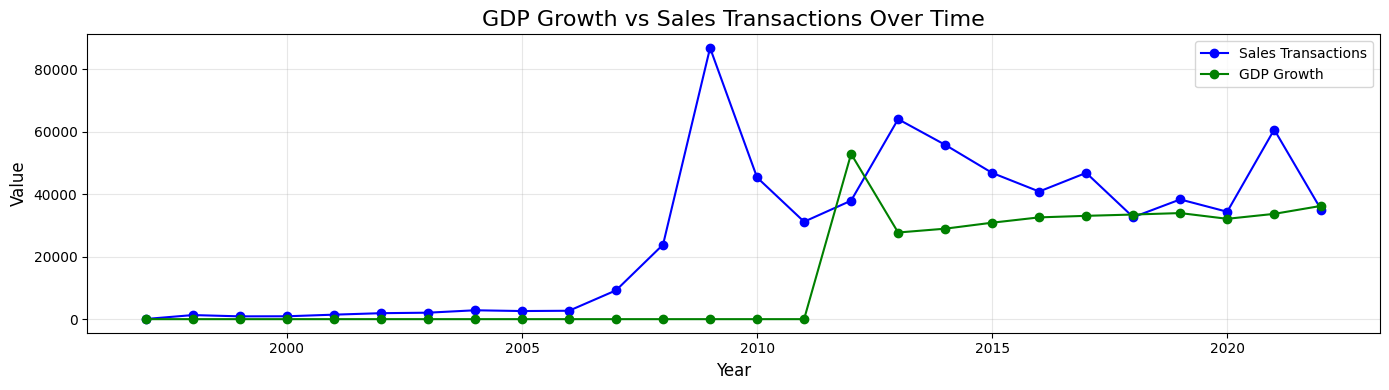

In [86]:


# Plot trends
plt.figure(figsize=(14, 4))
plt.plot(merged_macro_transactions_df['Year'], merged_macro_transactions_df['Sales Transactions'], label='Sales Transactions', color='blue', marker='o')
plt.plot(merged_macro_transactions_df['Year'], merged_macro_transactions_df['GDP_constant'], label='GDP Growth', color='green', marker='o')

# Add labels and legend
plt.title('GDP Growth vs Sales Transactions Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [87]:
merged_macro_transactions_df.columns

Index(['Year', 'Sales Transactions', 'Rental Transactions', 'GDP_constant',
       'GDP_current', 'total_population', 'total_population_female',
       'total_population_male', 'total_population_others', 'tourism_guests',
       'currency_strength', 'GDP_per_capita', 'Tourism_revenue_per_capita',
       'Population_growth_rate', 'Tourism_growth_rate'],
      dtype='object')

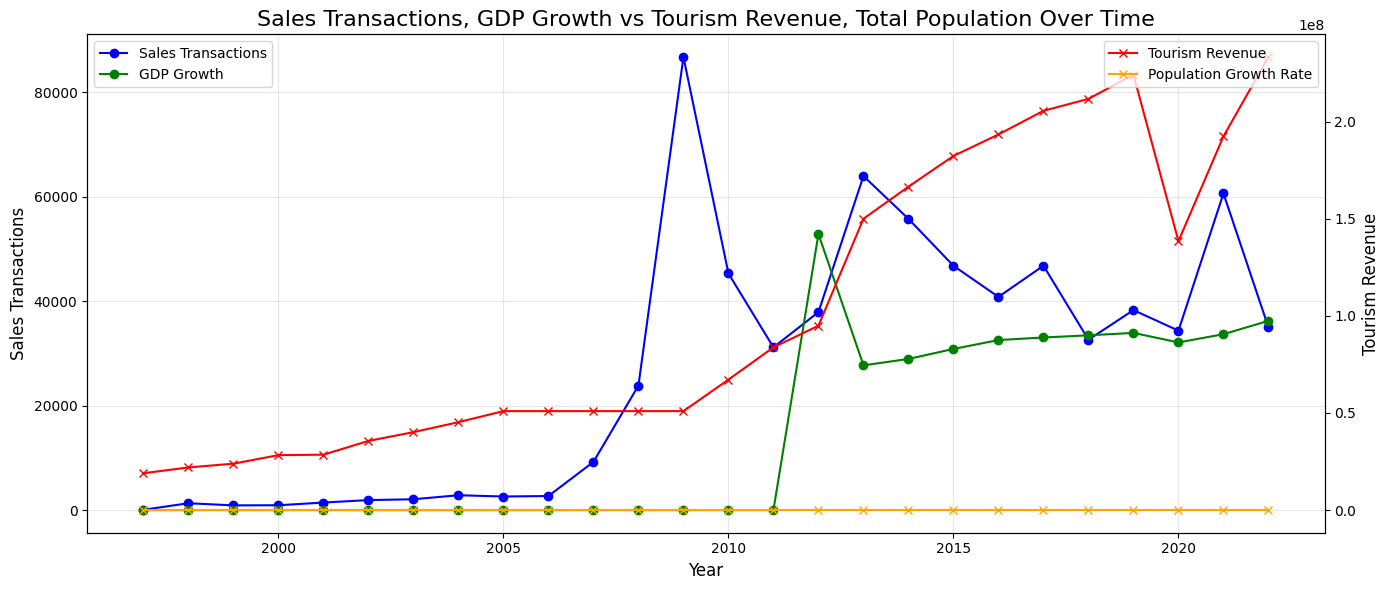

In [88]:
import matplotlib.pyplot as plt

def plot_trends_with_two_y_axes(df, x_column, y1_column, y2_column, y3_column, y4_column, title, y1_label, y2_label, y3_label, y4_label):
    """
    Plot two features on the left y-axis and another two on the right y-axis.
    
    Parameters:
    - df: DataFrame containing the data
    - x_column: Column for the x-axis (usually 'Year')
    - y1_column: Column for the first feature on the left y-axis
    - y2_column: Column for the second feature on the left y-axis
    - y3_column: Column for the first feature on the right y-axis
    - y4_column: Column for the second feature on the right y-axis
    - title: Title of the plot
    - y1_label: Label for the first left y-axis
    - y2_label: Label for the second left y-axis
    - y3_label: Label for the first right y-axis
    - y4_label: Label for the second right y-axis
    """
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    # Left Y axis: y1_column and y2_column
    ax1.plot(df[x_column], df[y1_column], label=y1_label, color='blue', marker='o')
    ax1.plot(df[x_column], df[y2_column], label=y2_label, color='green', marker='o')
    
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel(y1_label, fontsize=12)
    ax1.legend(loc='upper left')
    ax1.grid(alpha=0.3)
    
    # Right Y axis: y3_column and y4_column
    ax2 = ax1.twinx()
    ax2.plot(df[x_column], df[y3_column], label=y3_label, color='red', marker='x')
    ax2.plot(df[x_column], df[y4_column], label=y4_label, color='orange', marker='x')
    
    ax2.set_ylabel(y3_label, fontsize=12)
    ax2.legend(loc='upper right')
    
    # Title and layout adjustments
    plt.title(title, fontsize=16)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage of the function:
plot_trends_with_two_y_axes(
    df=merged_macro_transactions_df,
    x_column='Year',
    y1_column='Sales Transactions',
    y2_column='GDP_constant',
    y3_column='tourism_guests',
    y4_column='Population_growth_rate',
    title='Sales Transactions, GDP Growth vs Tourism Revenue, Total Population Over Time',
    y1_label='Sales Transactions',
    y2_label='GDP Growth',
    y3_label='Tourism Revenue',
    y4_label='Population Growth Rate'
)


In [89]:
merged_macro_transactions_df.head(2)

,Year,Sales Transactions,Rental Transactions,GDP_constant,GDP_current,total_population,total_population_female,total_population_male,total_population_others,tourism_guests,currency_strength,GDP_per_capita,Tourism_revenue_per_capita,Population_growth_rate,Tourism_growth_rate
0,1997,56,0.0,0.0,0.0,5457460.0,1823941.0,904789.0,2728730.0,18970378.0,0.272354,0.0,3.476045,0.045094,-0.009493
1,1998,1309,0.0,0.0,0.0,5691510.0,1912678.0,933077.0,2845755.0,21949904.0,0.272354,0.0,3.856605,0.042886,0.157062


- save the processed dataframe to disk

In [102]:
# processed_gdp_quarterly_constant_df.to_parquet("../datasets/processed/processed_gdp_quarterly_constant_df.parquet")
# 
merged_macro_transactions_df.to_parquet("../datasets/processed/merged_macro_transactions.parquet")
property_transactions_df.to_parquet("../datasets/processed/property_transactions.parquet")

In [106]:
property_rental_transactions_required_df = \
property_rental_transactions_df[['Registration Date', 'Usage', 'Property Type',
    'Nearest Metro', 'Nearest Mall', 'Nearest Landmark','Area','Property Sub Type',
    'Contract Amount', 'Annual Amount', 'Property Size (sq.m)']]
# property_rental_transactions_required_df
property_rental_transactions_required_df.to_parquet("../datasets/processed/property_rental_transactions_required.parquet")


In [ ]:
# property_rental_transactions_required_df.info()

In [ ]:
# Property Type or/and Property Sub Type
# Number of rooms/bedrooms
# Property Size (sq.m)
# Area/Neighborhood
# Nearest Metro
# Nearest Mall
# Nearest Landmark
# Usage (commercial/residential)
# Average prices the previous month/week (for the same kind of property)

In [92]:
property_rental_transactions_df.columns

Index(['Ejari Contract Number', 'Registration Date', 'Start Date', 'End Date',
       'Property ID', 'Version', 'Area', 'Contract Amount', 'Annual Amount',
       'Is Free Hold?', 'Property Size (sq.m)', 'Property Type',
       'Property Sub Type', 'Usage', 'Nearest Metro', 'Nearest Mall',
       'Nearest Landmark', 'No of Units', 'Year'],
      dtype='object')

In [273]:
property_rental_transactions_df.shape, property_transactions_df.shape, merged_macro_transactions_df.shape

((5380162, 19), (995975, 26))